# lorapy symbol viewer

In [15]:
%load_ext autoreload
%autoreload 2

import pathlib

import os, sys
from loguru import logger
logger.remove(None)
logger.add(sys.stdout, colorize=True)

import numpy as np
import pandas as pd
from six.moves import cPickle
import tqdm
from tqdm import tqdm_notebook
import warnings 

import matplotlib.pyplot as plt 
# plt.style.use('dark_background')
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import lorapy

## setup 

In [3]:
_BASE_DATA_DIR = pathlib.Path('../data')

BENCHTOP_DATA_DIR = _BASE_DATA_DIR.joinpath('lora-benchtop-recording')
DOTP_DATA_DIR = _BASE_DATA_DIR.joinpath('symbol-ref')
DEV_DATA_DIR = _BASE_DATA_DIR.joinpath('dev-data')
PROC_SYMBOL_DIR = _BASE_DATA_DIR.joinpath('processed-symbols')
FILT_SYMBOL_DIR = _BASE_DATA_DIR.joinpath('filtered-symbols')

# load

In [4]:
import random
import warnings 

rand = lambda mx: random.randint(0, mx - 1)

def _load_matching_dotp(bw: int, sf: int):
    return ploader.filter(bw=bw, sf=sf)[0]


def _plot_check(filtered_syms, num=20):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        
        fig, ax = plt.subplots(num, figsize=(14, 10))

        for idx in range(num):
            ax[idx].plot(filtered_syms[rand(filtered_syms.shape[0])])
            
            
def _format_output_path(out_dir, file):    
    out_path = out_dir.joinpath(file.name)
    return out_path


def _save_symbols(data, out_dir, file):
    out_path = _format_output_path(out_dir, file)
    
    with out_path.open('wb') as outfile:
        cPickle.dump(data, outfile)

## files

In [5]:
symloader = lorapy.load_dotp(PROC_SYMBOL_DIR)
symloader.file_list

2020-04-10 17:56:14.498 | DEBUG    | lorapy.io._base_loader:_validate_data_path:140 - set datafile directory: ../data/processed-symbols
2020-04-10 17:56:14.503 | INFO     | lorapy.io._base_loader:_process_data_dir:153 - found 106 data file(s)


[DotPFile(id=0 | name='lora_BW1_SF10_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=1 | name='lora_BW2_SF12_915MHz_20ksps_Att40_v0.p'),
 DotPFile(id=2 | name='lora_BW8_SF12_915MHz_20ksps_Att120_v0.p'),
 DotPFile(id=3 | name='lora_BW1_SF10_915MHz_20ksps_Att140_v0.p'),
 DotPFile(id=4 | name='lora_BW1_SF12_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=5 | name='lora_BW1_SF12_915MHz_20ksps_Att60_v0.p'),
 DotPFile(id=6 | name='lora_BW7_SF10_915MHz_20ksps_Att40_v0.p'),
 DotPFile(id=7 | name='lora_BW2_SF10_915MHz_20ksps_Att40_v0.p'),
 DotPFile(id=8 | name='lora_BW9_SF12_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=9 | name='lora_BW2_SF12_915MHz_20ksps_Att60_v0.p'),
 DotPFile(id=10 | name='lora_BW2_SF10_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=11 | name='lora_BW9_SF11_915MHz_20ksps_Att100_v0.p'),
 DotPFile(id=12 | name='lora_BW7_SF10_915MHz_20ksps_Att100_v0.p'),
 DotPFile(id=13 | name='lora_BW1_SF10_915MHz_20ksps_Att40_v0.p'),
 DotPFile(id=14 | name='lora_BW7_SF11_915MHz_20ksps_Att80_v0.p'),
 DotPFile(id=15 | na

In [6]:
ploader = lorapy.load_dotp(DOTP_DATA_DIR)
ploader.file_list

2020-04-10 17:56:14.526 | DEBUG    | lorapy.io._base_loader:_validate_data_path:140 - set datafile directory: ../data/symbol-ref
2020-04-10 17:56:14.528 | INFO     | lorapy.io._base_loader:_process_data_dir:153 - found 15 data file(s)


[DotPFile(id=0 | name='lora_BW1_SF10_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=1 | name='lora_BW1_SF12_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=2 | name='lora_BW9_SF12_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=3 | name='lora_BW2_SF10_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=4 | name='lora_BW9_SF11_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=5 | name='lora_BW2_SF12_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=6 | name='lora_BW8_SF12_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=7 | name='lora_BW7_SF10_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=8 | name='lora_BW8_SF11_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=9 | name='lora_BW8_SF10_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=10 | name='lora_BW1_SF11_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=11 | name='lora_BW2_SF11_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=12 | name='lora_BW9_SF10_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=13 | name='lora_BW7_SF12_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=14 | name='lora_BW7_SF11_915MHz_20ksps_Att0_v0.p')]

## symbols

In [112]:
file = symloader.select(29)
file.load()
display(file)

pfile = _load_matching_dotp(file.bw, file.sf)
display(pfile)

base_symbol = pfile.to_signal()
display(base_symbol)

2020-04-10 20:21:04.430 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 800 and packet length: 24200
2020-04-10 20:21:04.568 | INFO     | lorapy.datafile._base_file:load:61 - loaded 5913600 samples from file


DotPFile(id=29 | name='lora_BW9_SF11_915MHz_20ksps_Att40_v0.p')

DotPFile(id=4 | name='lora_BW9_SF11_915MHz_20ksps_Att0_v0.p')

2020-04-10 20:21:04.575 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 800 and packet length: 24200
2020-04-10 20:21:04.576 | INFO     | lorapy.datafile._base_file:load:61 - loaded 799 samples from file


BaselineSymbolSet(num symbols=799 | BW: 9 | SF: 11 | Att: 0 | samples per symbol: 800 | packet length: 24200)

In [113]:
symbols = file.to_signal()
symbols

BaselineSymbolSet(num symbols=7392 | BW: 9 | SF: 11 | Att: 40 | samples per symbol: 800 | packet length: 24200)

# symbol filtering

In [63]:
def filter_symbols(file, thresh_type='window', plot=False):
    symbols = file.to_signal()
    display(symbols)

    pfile = _load_matching_dotp(file.bw, file.sf)
    base_symbol = pfile.to_signal()
    display(base_symbol)
    
    conv_vals = [
        base_symbol.convolve(sym)
        for sym in symbols.data
    ]
    
    thresh = (
        np.quantile(conv_vals, [0.25])[0] if thresh_type == 'quant' 
        else (0.9, 1.1) if thresh_type == 'window' 
        else np.mean(conv_vals)/2
    )
    logger.info(f'set threshold: {thresh:0.4f}')
    
    if plot:
        df = pd.DataFrame(conv_vals).rename(columns={0: 'data'})
        df.plot.hist(bins=30)
    
    if thresh_type == 'window':
        filtered_syms = np.vstack([
            sym for sym, conv in zip(symbols.data, conv_vals)
            if conv > thresh[0] and conv < thresh[1]
        ])
    else:
        filtered_syms = np.vstack([
            sym for sym, conv in zip(symbols.data, conv_vals)
            if conv > thresh
        ])

    _removed_syms = symbols.data.shape[0] - len(filtered_syms)
    logger.warning(f'removed {_removed_syms} symbols  [{len(filtered_syms)} / {symbols.data.shape[0]}]')
    
    if plot:
        _plot_check(filtered_syms, 40)
        
    return filtered_syms, conv_vals

In [241]:
def _fft_convolve_autocorr(symbol: np.ndarray):
    return spsig.fftconvolve(symbol, symbol[::-1], mode='full')

def _sp_corr(base_symbol: np.ndarray, packet_slice: np.ndarray) -> float:
    min_size = np.min((base_symbol.size, packet_slice.size))
    corr = spsig.correlate(base_symbol, packet_slice)
    return np.abs(corr.max())
    

def filter_symbols_fftcorr(file, plot=False):
    symbols = file.to_signal()
    display(symbols)

    pfile = _load_matching_dotp(file.bw, file.sf)
    base_symbol = pfile.to_signal()
    display(base_symbol)
    

    corr_fftconvs = np.vstack([
        _sp_corr(base_symbol.data, _fft_convolve_autocorr(sym))
        for sym in symbols.data
    ])
    
    thresh = corr_fftconvs.mean()
    logger.info(f'set threshold: {thresh:0.4f}')
    
    filtered_symbols = [
        sym for sym, corr in zip(symbols.data, corr_fftconvs)
        if corr > thresh
    ]
    
    _removed_syms = symbols.data.shape[0] - len(filtered_symbols)
    logger.warning(f'removed {_removed_syms} symbols  [{len(filtered_symbols)} / {symbols.data.shape[0]}]')
    
    if plot:
        _plot_check(filtered_symbols, 40)
        
    return filtered_symbols, corr_fftconvs

In [17]:
for file in tqdm.tqdm(symloader.file_list):
    logger.warning(f'working file {file}')
    file.load()
    if file.bw > 6 and file.att > 100:
        continue
    
    filtered_symbols = filter_symbols(file, thresh_type='quant', plot=False)
    _save_symbols(filtered_symbols, FILT_SYMBOL_DIR, file)
    

  0%|          | 0/106 [00:00<?, ?it/s]

2020-04-10 18:07:03.608 | WARNING  | __main__:<module>:2 - working file DotPFile(id=0 | name='lora_BW1_SF10_915MHz_20ksps_Att0_v0.p')
2020-04-10 18:07:03.609 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 19198 and packet length: 580739
2020-04-10 18:07:04.018 | INFO     | lorapy.datafile._base_file:load:61 - loaded 8907872 samples from file


BaselineSymbolSet(num symbols=464 | BW: 1 | SF: 10 | Att: 0 | samples per symbol: 19198 | packet length: 580739)

2020-04-10 18:07:04.021 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 19198 and packet length: 580739
2020-04-10 18:07:04.023 | INFO     | lorapy.datafile._base_file:load:61 - loaded 19197 samples from file


BaselineSymbolSet(num symbols=19197 | BW: 1 | SF: 10 | Att: 0 | samples per symbol: 19198 | packet length: 580739)

2020-04-10 18:08:40.881 | INFO     | __main__:filter_symbols:15 - set threshold: 0.6722
2020-04-10 18:08:41.199 | WARNING  | __main__:filter_symbols:27 - removed 116 symbols  [348 / 464]


  1%|          | 1/106 [01:37<2:51:29, 98.00s/it]

2020-04-10 18:08:41.605 | WARNING  | __main__:<module>:2 - working file DotPFile(id=1 | name='lora_BW2_SF12_915MHz_20ksps_Att40_v0.p')
2020-04-10 18:08:41.606 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 51197 and packet length: 1548709
2020-04-10 18:08:42.018 | INFO     | lorapy.datafile._base_file:load:61 - loaded 9573839 samples from file


BaselineSymbolSet(num symbols=187 | BW: 2 | SF: 12 | Att: 40 | samples per symbol: 51197 | packet length: 1548709)

2020-04-10 18:08:42.021 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 51197 and packet length: 1548709
2020-04-10 18:08:42.023 | INFO     | lorapy.datafile._base_file:load:61 - loaded 51197 samples from file


BaselineSymbolSet(num symbols=51197 | BW: 2 | SF: 12 | Att: 0 | samples per symbol: 51197 | packet length: 1548709)

2020-04-10 18:11:03.246 | INFO     | __main__:filter_symbols:15 - set threshold: 5.2735
2020-04-10 18:11:03.420 | WARNING  | __main__:filter_symbols:27 - removed 47 symbols  [140 / 187]


  2%|▏         | 2/106 [04:00<3:12:57, 111.32s/it]

2020-04-10 18:11:04.016 | WARNING  | __main__:<module>:2 - working file DotPFile(id=2 | name='lora_BW8_SF12_915MHz_20ksps_Att120_v0.p')
2020-04-10 18:11:04.017 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 3198 and packet length: 96739
2020-04-10 18:11:04.129 | INFO     | lorapy.datafile._base_file:load:61 - loaded 6613464 samples from file


  3%|▎         | 3/106 [04:00<2:13:49, 77.96s/it] 

2020-04-10 18:11:04.131 | WARNING  | __main__:<module>:2 - working file DotPFile(id=3 | name='lora_BW1_SF10_915MHz_20ksps_Att140_v0.p')
2020-04-10 18:11:04.132 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 19198 and packet length: 580739
2020-04-10 18:11:04.316 | INFO     | lorapy.datafile._base_file:load:61 - loaded 8178348 samples from file


BaselineSymbolSet(num symbols=426 | BW: 1 | SF: 10 | Att: 140 | samples per symbol: 19198 | packet length: 580739)

2020-04-10 18:11:04.321 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 19198 and packet length: 580739
2020-04-10 18:11:04.323 | INFO     | lorapy.datafile._base_file:load:61 - loaded 19197 samples from file


BaselineSymbolSet(num symbols=19197 | BW: 1 | SF: 10 | Att: 0 | samples per symbol: 19198 | packet length: 580739)

2020-04-10 18:11:56.213 | INFO     | __main__:filter_symbols:15 - set threshold: 8553.0122
2020-04-10 18:11:56.244 | WARNING  | __main__:filter_symbols:27 - removed 107 symbols  [319 / 426]


  4%|▍         | 4/106 [04:52<1:59:23, 70.23s/it]

2020-04-10 18:11:56.337 | WARNING  | __main__:<module>:2 - working file DotPFile(id=4 | name='lora_BW1_SF12_915MHz_20ksps_Att0_v0.p')
2020-04-10 18:11:56.339 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 76801 and packet length: 2323230
2020-04-10 18:11:56.670 | INFO     | lorapy.datafile._base_file:load:61 - loaded 8448110 samples from file


BaselineSymbolSet(num symbols=110 | BW: 1 | SF: 12 | Att: 0 | samples per symbol: 76801 | packet length: 2323230)

2020-04-10 18:11:56.675 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 76801 and packet length: 2323230
2020-04-10 18:11:56.677 | INFO     | lorapy.datafile._base_file:load:61 - loaded 76800 samples from file


BaselineSymbolSet(num symbols=76800 | BW: 1 | SF: 12 | Att: 0 | samples per symbol: 76801 | packet length: 2323230)

2020-04-10 18:14:27.386 | INFO     | __main__:filter_symbols:15 - set threshold: 0.6749
2020-04-10 18:14:27.455 | WARNING  | __main__:filter_symbols:27 - removed 28 symbols  [82 / 110]


  5%|▍         | 5/106 [07:24<2:39:10, 94.56s/it]

2020-04-10 18:14:27.658 | WARNING  | __main__:<module>:2 - working file DotPFile(id=5 | name='lora_BW1_SF12_915MHz_20ksps_Att60_v0.p')
2020-04-10 18:14:27.659 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 76801 and packet length: 2323230
2020-04-10 18:14:27.821 | INFO     | lorapy.datafile._base_file:load:61 - loaded 8448110 samples from file


BaselineSymbolSet(num symbols=110 | BW: 1 | SF: 12 | Att: 60 | samples per symbol: 76801 | packet length: 2323230)

2020-04-10 18:14:27.826 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 76801 and packet length: 2323230
2020-04-10 18:14:27.828 | INFO     | lorapy.datafile._base_file:load:61 - loaded 76800 samples from file


BaselineSymbolSet(num symbols=76800 | BW: 1 | SF: 12 | Att: 0 | samples per symbol: 76801 | packet length: 2323230)

2020-04-10 18:16:24.679 | INFO     | __main__:filter_symbols:15 - set threshold: 55.5604
2020-04-10 18:16:24.748 | WARNING  | __main__:filter_symbols:27 - removed 28 symbols  [82 / 110]


  6%|▌         | 6/106 [09:21<2:48:55, 101.36s/it]

2020-04-10 18:16:24.870 | WARNING  | __main__:<module>:2 - working file DotPFile(id=6 | name='lora_BW7_SF10_915MHz_20ksps_Att40_v0.p')
2020-04-10 18:16:24.871 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 1599 and packet length: 48369
2020-04-10 18:16:25.017 | INFO     | lorapy.datafile._base_file:load:61 - loaded 6728592 samples from file


BaselineSymbolSet(num symbols=4208 | BW: 7 | SF: 10 | Att: 40 | samples per symbol: 1599 | packet length: 48369)

2020-04-10 18:16:25.021 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 1599 and packet length: 48369
2020-04-10 18:16:25.022 | INFO     | lorapy.datafile._base_file:load:61 - loaded 1599 samples from file


BaselineSymbolSet(num symbols=1599 | BW: 7 | SF: 10 | Att: 0 | samples per symbol: 1599 | packet length: 48369)

2020-04-10 18:16:28.535 | INFO     | __main__:filter_symbols:15 - set threshold: 1.5714
2020-04-10 18:16:28.575 | WARNING  | __main__:filter_symbols:27 - removed 1052 symbols  [3156 / 4208]


  7%|▋         | 7/106 [09:25<1:58:56, 72.08s/it] 

2020-04-10 18:16:28.646 | WARNING  | __main__:<module>:2 - working file DotPFile(id=7 | name='lora_BW2_SF10_915MHz_20ksps_Att40_v0.p')
2020-04-10 18:16:28.647 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 12802 and packet length: 387260
2020-04-10 18:16:28.953 | INFO     | lorapy.datafile._base_file:load:61 - loaded 8641350 samples from file


BaselineSymbolSet(num symbols=675 | BW: 2 | SF: 10 | Att: 40 | samples per symbol: 12802 | packet length: 387260)

2020-04-10 18:16:28.957 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 12802 and packet length: 387260
2020-04-10 18:16:28.959 | INFO     | lorapy.datafile._base_file:load:61 - loaded 12801 samples from file


BaselineSymbolSet(num symbols=12801 | BW: 2 | SF: 10 | Att: 0 | samples per symbol: 12802 | packet length: 387260)

2020-04-10 18:17:32.719 | INFO     | __main__:filter_symbols:15 - set threshold: 5.6326
2020-04-10 18:17:32.765 | WARNING  | __main__:filter_symbols:27 - removed 169 symbols  [506 / 675]


  8%|▊         | 8/106 [10:29<1:53:55, 69.75s/it]

2020-04-10 18:17:32.954 | WARNING  | __main__:<module>:2 - working file DotPFile(id=8 | name='lora_BW9_SF12_915MHz_20ksps_Att0_v0.p')
2020-04-10 18:17:32.956 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 1599 and packet length: 48369
2020-04-10 18:17:33.123 | INFO     | lorapy.datafile._base_file:load:61 - loaded 4397250 samples from file


BaselineSymbolSet(num symbols=2750 | BW: 9 | SF: 12 | Att: 0 | samples per symbol: 1599 | packet length: 48369)

2020-04-10 18:17:33.128 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 1599 and packet length: 48369
2020-04-10 18:17:33.129 | INFO     | lorapy.datafile._base_file:load:61 - loaded 1599 samples from file


BaselineSymbolSet(num symbols=1599 | BW: 9 | SF: 12 | Att: 0 | samples per symbol: 1599 | packet length: 48369)

2020-04-10 18:17:37.499 | INFO     | __main__:filter_symbols:15 - set threshold: 0.1027
2020-04-10 18:17:37.529 | WARNING  | __main__:filter_symbols:27 - removed 688 symbols  [2062 / 2750]


  8%|▊         | 9/106 [10:34<1:21:11, 50.22s/it]

2020-04-10 18:17:37.617 | WARNING  | __main__:<module>:2 - working file DotPFile(id=9 | name='lora_BW2_SF12_915MHz_20ksps_Att60_v0.p')
2020-04-10 18:17:37.618 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 51197 and packet length: 1548709
2020-04-10 18:17:37.946 | INFO     | lorapy.datafile._base_file:load:61 - loaded 9573839 samples from file


BaselineSymbolSet(num symbols=187 | BW: 2 | SF: 12 | Att: 60 | samples per symbol: 51197 | packet length: 1548709)

2020-04-10 18:17:37.950 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 51197 and packet length: 1548709
2020-04-10 18:17:37.952 | INFO     | lorapy.datafile._base_file:load:61 - loaded 51197 samples from file


BaselineSymbolSet(num symbols=51197 | BW: 2 | SF: 12 | Att: 0 | samples per symbol: 51197 | packet length: 1548709)

2020-04-10 18:19:57.488 | INFO     | __main__:filter_symbols:15 - set threshold: 53.0498
2020-04-10 18:19:57.561 | WARNING  | __main__:filter_symbols:27 - removed 47 symbols  [140 / 187]


  9%|▉         | 10/106 [12:54<2:03:31, 77.20s/it]

2020-04-10 18:19:57.771 | WARNING  | __main__:<module>:2 - working file DotPFile(id=10 | name='lora_BW2_SF10_915MHz_20ksps_Att0_v0.p')
2020-04-10 18:19:57.772 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 12802 and packet length: 387260
2020-04-10 18:19:57.927 | INFO     | lorapy.datafile._base_file:load:61 - loaded 8743766 samples from file


BaselineSymbolSet(num symbols=683 | BW: 2 | SF: 10 | Att: 0 | samples per symbol: 12802 | packet length: 387260)

2020-04-10 18:19:57.931 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 12802 and packet length: 387260
2020-04-10 18:19:57.932 | INFO     | lorapy.datafile._base_file:load:61 - loaded 12801 samples from file


BaselineSymbolSet(num symbols=12801 | BW: 2 | SF: 10 | Att: 0 | samples per symbol: 12802 | packet length: 387260)

2020-04-10 18:20:40.348 | INFO     | __main__:filter_symbols:15 - set threshold: 0.6044
2020-04-10 18:20:40.377 | WARNING  | __main__:filter_symbols:27 - removed 171 symbols  [512 / 683]


 10%|█         | 11/106 [13:36<1:45:51, 66.85s/it]

2020-04-10 18:20:40.479 | WARNING  | __main__:<module>:2 - working file DotPFile(id=11 | name='lora_BW9_SF11_915MHz_20ksps_Att100_v0.p')
2020-04-10 18:20:40.480 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 800 and packet length: 24200
2020-04-10 18:20:40.686 | INFO     | lorapy.datafile._base_file:load:61 - loaded 5655200 samples from file


BaselineSymbolSet(num symbols=7069 | BW: 9 | SF: 11 | Att: 100 | samples per symbol: 800 | packet length: 24200)

2020-04-10 18:20:40.690 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 800 and packet length: 24200
2020-04-10 18:20:40.691 | INFO     | lorapy.datafile._base_file:load:61 - loaded 799 samples from file


BaselineSymbolSet(num symbols=799 | BW: 9 | SF: 11 | Att: 0 | samples per symbol: 800 | packet length: 24200)

2020-04-10 18:20:43.669 | INFO     | __main__:filter_symbols:15 - set threshold: 772.6039
2020-04-10 18:20:43.711 | WARNING  | __main__:filter_symbols:27 - removed 1768 symbols  [5301 / 7069]


 11%|█▏        | 12/106 [13:40<1:14:53, 47.80s/it]

2020-04-10 18:20:43.825 | WARNING  | __main__:<module>:2 - working file DotPFile(id=12 | name='lora_BW7_SF10_915MHz_20ksps_Att100_v0.p')
2020-04-10 18:20:43.826 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 1599 and packet length: 48369
2020-04-10 18:20:43.965 | INFO     | lorapy.datafile._base_file:load:61 - loaded 6899685 samples from file


BaselineSymbolSet(num symbols=4315 | BW: 7 | SF: 10 | Att: 100 | samples per symbol: 1599 | packet length: 48369)

2020-04-10 18:20:43.969 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 1599 and packet length: 48369
2020-04-10 18:20:43.970 | INFO     | lorapy.datafile._base_file:load:61 - loaded 1599 samples from file


BaselineSymbolSet(num symbols=1599 | BW: 7 | SF: 10 | Att: 0 | samples per symbol: 1599 | packet length: 48369)

2020-04-10 18:20:47.439 | INFO     | __main__:filter_symbols:15 - set threshold: 1351.3137
2020-04-10 18:20:47.495 | WARNING  | __main__:filter_symbols:27 - removed 1079 symbols  [3236 / 4315]


 12%|█▏        | 13/106 [13:43<53:36, 34.58s/it]  

2020-04-10 18:20:47.566 | WARNING  | __main__:<module>:2 - working file DotPFile(id=13 | name='lora_BW1_SF10_915MHz_20ksps_Att40_v0.p')
2020-04-10 18:20:47.568 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 19198 and packet length: 580739
2020-04-10 18:20:47.901 | INFO     | lorapy.datafile._base_file:load:61 - loaded 7525616 samples from file


BaselineSymbolSet(num symbols=392 | BW: 1 | SF: 10 | Att: 40 | samples per symbol: 19198 | packet length: 580739)

2020-04-10 18:20:47.906 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 19198 and packet length: 580739
2020-04-10 18:20:47.907 | INFO     | lorapy.datafile._base_file:load:61 - loaded 19197 samples from file


BaselineSymbolSet(num symbols=19197 | BW: 1 | SF: 10 | Att: 0 | samples per symbol: 19198 | packet length: 580739)

2020-04-10 18:22:15.821 | INFO     | __main__:filter_symbols:15 - set threshold: 6.1368
2020-04-10 18:22:15.868 | WARNING  | __main__:filter_symbols:27 - removed 98 symbols  [294 / 392]


 13%|█▎        | 14/106 [15:12<1:17:50, 50.76s/it]

2020-04-10 18:22:16.082 | WARNING  | __main__:<module>:2 - working file DotPFile(id=14 | name='lora_BW7_SF11_915MHz_20ksps_Att80_v0.p')
2020-04-10 18:22:16.083 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 3198 and packet length: 96739
2020-04-10 18:22:16.218 | INFO     | lorapy.datafile._base_file:load:61 - loaded 6555900 samples from file


BaselineSymbolSet(num symbols=2050 | BW: 7 | SF: 11 | Att: 80 | samples per symbol: 3198 | packet length: 96739)

2020-04-10 18:22:16.222 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 3198 and packet length: 96739
2020-04-10 18:22:16.224 | INFO     | lorapy.datafile._base_file:load:61 - loaded 3198 samples from file


BaselineSymbolSet(num symbols=3198 | BW: 7 | SF: 11 | Att: 0 | samples per symbol: 3198 | packet length: 96739)

2020-04-10 18:22:22.765 | INFO     | __main__:filter_symbols:15 - set threshold: 142.1138
2020-04-10 18:22:22.800 | WARNING  | __main__:filter_symbols:27 - removed 513 symbols  [1537 / 2050]


 14%|█▍        | 15/106 [15:19<56:58, 37.57s/it]  

2020-04-10 18:22:22.867 | WARNING  | __main__:<module>:2 - working file DotPFile(id=15 | name='lora_BW2_SF11_915MHz_20ksps_Att40_v0.p')
2020-04-10 18:22:22.868 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 25604 and packet length: 774521
2020-04-10 18:22:23.039 | INFO     | lorapy.datafile._base_file:load:61 - loaded 8321300 samples from file


BaselineSymbolSet(num symbols=325 | BW: 2 | SF: 11 | Att: 40 | samples per symbol: 25604 | packet length: 774521)

2020-04-10 18:22:23.043 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 25604 and packet length: 774521
2020-04-10 18:22:23.044 | INFO     | lorapy.datafile._base_file:load:61 - loaded 25603 samples from file


BaselineSymbolSet(num symbols=25603 | BW: 2 | SF: 11 | Att: 0 | samples per symbol: 25604 | packet length: 774521)

2020-04-10 18:23:26.103 | INFO     | __main__:filter_symbols:15 - set threshold: 5.4924
2020-04-10 18:23:26.137 | WARNING  | __main__:filter_symbols:27 - removed 83 symbols  [242 / 325]


 15%|█▌        | 16/106 [16:22<1:07:57, 45.31s/it]

2020-04-10 18:23:26.231 | WARNING  | __main__:<module>:2 - working file DotPFile(id=16 | name='lora_BW1_SF11_915MHz_20ksps_Att40_v0.p')
2020-04-10 18:23:26.232 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 38396 and packet length: 1161479
2020-04-10 18:23:26.373 | INFO     | lorapy.datafile._base_file:load:61 - loaded 7180052 samples from file


BaselineSymbolSet(num symbols=187 | BW: 1 | SF: 11 | Att: 40 | samples per symbol: 38396 | packet length: 1161479)

2020-04-10 18:23:26.377 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 38396 and packet length: 1161479
2020-04-10 18:23:26.378 | INFO     | lorapy.datafile._base_file:load:61 - loaded 38395 samples from file


BaselineSymbolSet(num symbols=38395 | BW: 1 | SF: 11 | Att: 0 | samples per symbol: 38396 | packet length: 1161479)

2020-04-10 18:24:42.346 | INFO     | __main__:filter_symbols:15 - set threshold: 6.0551
2020-04-10 18:24:42.372 | WARNING  | __main__:filter_symbols:27 - removed 47 symbols  [140 / 187]


 16%|█▌        | 17/106 [17:38<1:20:58, 54.59s/it]

2020-04-10 18:24:42.476 | WARNING  | __main__:<module>:2 - working file DotPFile(id=17 | name='lora_BW8_SF10_915MHz_20ksps_Att40_v0.p')
2020-04-10 18:24:42.477 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 800 and packet length: 24200
2020-04-10 18:24:42.648 | INFO     | lorapy.datafile._base_file:load:61 - loaded 5846400 samples from file


BaselineSymbolSet(num symbols=7308 | BW: 8 | SF: 10 | Att: 40 | samples per symbol: 800 | packet length: 24200)

2020-04-10 18:24:42.652 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 800 and packet length: 24200
2020-04-10 18:24:42.654 | INFO     | lorapy.datafile._base_file:load:61 - loaded 799 samples from file


BaselineSymbolSet(num symbols=799 | BW: 8 | SF: 10 | Att: 0 | samples per symbol: 800 | packet length: 24200)

2020-04-10 18:24:44.549 | INFO     | __main__:filter_symbols:15 - set threshold: 1.2036
2020-04-10 18:24:44.596 | WARNING  | __main__:filter_symbols:27 - removed 1827 symbols  [5481 / 7308]


 17%|█▋        | 18/106 [17:41<57:00, 38.87s/it]  

2020-04-10 18:24:44.657 | WARNING  | __main__:<module>:2 - working file DotPFile(id=18 | name='lora_BW7_SF12_915MHz_20ksps_Att120_v0.p')
2020-04-10 18:24:44.658 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 6386 and packet length: 193176
2020-04-10 18:24:45.028 | INFO     | lorapy.datafile._base_file:load:61 - loaded 6507334 samples from file


 18%|█▊        | 19/106 [17:41<39:36, 27.32s/it]

2020-04-10 18:24:45.030 | WARNING  | __main__:<module>:2 - working file DotPFile(id=19 | name='lora_BW2_SF12_915MHz_20ksps_Att100_v0.p')
2020-04-10 18:24:45.031 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 51197 and packet length: 1548709
2020-04-10 18:24:45.340 | INFO     | lorapy.datafile._base_file:load:61 - loaded 7013989 samples from file


BaselineSymbolSet(num symbols=137 | BW: 2 | SF: 12 | Att: 100 | samples per symbol: 51197 | packet length: 1548709)

2020-04-10 18:24:45.345 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 51197 and packet length: 1548709
2020-04-10 18:24:45.347 | INFO     | lorapy.datafile._base_file:load:61 - loaded 51197 samples from file


BaselineSymbolSet(num symbols=51197 | BW: 2 | SF: 12 | Att: 0 | samples per symbol: 51197 | packet length: 1548709)

2020-04-10 18:26:34.534 | INFO     | __main__:filter_symbols:15 - set threshold: 4862.2294
2020-04-10 18:26:34.577 | WARNING  | __main__:filter_symbols:27 - removed 35 symbols  [102 / 137]


 19%|█▉        | 20/106 [19:31<1:14:36, 52.05s/it]

2020-04-10 18:26:34.799 | WARNING  | __main__:<module>:2 - working file DotPFile(id=20 | name='lora_BW1_SF12_915MHz_20ksps_Att40_v0.p')
2020-04-10 18:26:34.801 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 76801 and packet length: 2323230
2020-04-10 18:26:35.273 | INFO     | lorapy.datafile._base_file:load:61 - loaded 8448110 samples from file


BaselineSymbolSet(num symbols=110 | BW: 1 | SF: 12 | Att: 40 | samples per symbol: 76801 | packet length: 2323230)

2020-04-10 18:26:35.277 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 76801 and packet length: 2323230
2020-04-10 18:26:35.279 | INFO     | lorapy.datafile._base_file:load:61 - loaded 76800 samples from file


BaselineSymbolSet(num symbols=76800 | BW: 1 | SF: 12 | Att: 0 | samples per symbol: 76801 | packet length: 2323230)

2020-04-10 18:29:01.865 | INFO     | __main__:filter_symbols:15 - set threshold: 5.9578
2020-04-10 18:29:01.979 | WARNING  | __main__:filter_symbols:27 - removed 28 symbols  [82 / 110]


 20%|█▉        | 21/106 [21:58<1:54:19, 80.70s/it]

2020-04-10 18:29:02.329 | WARNING  | __main__:<module>:2 - working file DotPFile(id=21 | name='lora_BW2_SF10_915MHz_20ksps_Att120_v0.p')
2020-04-10 18:29:02.331 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 12802 and packet length: 387260
2020-04-10 18:29:02.671 | INFO     | lorapy.datafile._base_file:load:61 - loaded 7655596 samples from file


BaselineSymbolSet(num symbols=598 | BW: 2 | SF: 10 | Att: 120 | samples per symbol: 12802 | packet length: 387260)

2020-04-10 18:29:02.675 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 12802 and packet length: 387260
2020-04-10 18:29:02.677 | INFO     | lorapy.datafile._base_file:load:61 - loaded 12801 samples from file


BaselineSymbolSet(num symbols=12801 | BW: 2 | SF: 10 | Att: 0 | samples per symbol: 12802 | packet length: 387260)

2020-04-10 18:30:02.738 | INFO     | __main__:filter_symbols:15 - set threshold: 2053.1092
2020-04-10 18:30:02.787 | WARNING  | __main__:filter_symbols:27 - removed 150 symbols  [448 / 598]


 21%|██        | 22/106 [22:59<1:44:33, 74.68s/it]

2020-04-10 18:30:02.980 | WARNING  | __main__:<module>:2 - working file DotPFile(id=22 | name='lora_BW8_SF10_915MHz_20ksps_Att80_v0.p')
2020-04-10 18:30:02.982 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 800 and packet length: 24200
2020-04-10 18:30:03.173 | INFO     | lorapy.datafile._base_file:load:61 - loaded 6696800 samples from file


BaselineSymbolSet(num symbols=8371 | BW: 8 | SF: 10 | Att: 80 | samples per symbol: 800 | packet length: 24200)

2020-04-10 18:30:03.176 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 800 and packet length: 24200
2020-04-10 18:30:03.177 | INFO     | lorapy.datafile._base_file:load:61 - loaded 799 samples from file


BaselineSymbolSet(num symbols=799 | BW: 8 | SF: 10 | Att: 0 | samples per symbol: 800 | packet length: 24200)

2020-04-10 18:30:05.350 | INFO     | __main__:filter_symbols:15 - set threshold: 117.7557
2020-04-10 18:30:05.411 | WARNING  | __main__:filter_symbols:27 - removed 2093 symbols  [6278 / 8371]


 22%|██▏       | 23/106 [23:01<1:13:21, 53.03s/it]

2020-04-10 18:30:05.483 | WARNING  | __main__:<module>:2 - working file DotPFile(id=23 | name='lora_BW1_SF11_915MHz_20ksps_Att20_v0.p')
2020-04-10 18:30:05.484 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 38396 and packet length: 1161479
2020-04-10 18:30:05.852 | INFO     | lorapy.datafile._base_file:load:61 - loaded 8869476 samples from file


BaselineSymbolSet(num symbols=231 | BW: 1 | SF: 11 | Att: 20 | samples per symbol: 38396 | packet length: 1161479)

2020-04-10 18:30:05.855 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 38396 and packet length: 1161479
2020-04-10 18:30:05.857 | INFO     | lorapy.datafile._base_file:load:61 - loaded 38395 samples from file


BaselineSymbolSet(num symbols=38395 | BW: 1 | SF: 11 | Att: 0 | samples per symbol: 38396 | packet length: 1161479)

2020-04-10 18:32:08.366 | INFO     | __main__:filter_symbols:15 - set threshold: 0.8580
2020-04-10 18:32:08.436 | WARNING  | __main__:filter_symbols:27 - removed 58 symbols  [173 / 231]


 23%|██▎       | 24/106 [25:05<1:41:15, 74.09s/it]

2020-04-10 18:32:08.716 | WARNING  | __main__:<module>:2 - working file DotPFile(id=24 | name='lora_BW9_SF11_915MHz_20ksps_Att0_v0.p')
2020-04-10 18:32:08.717 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 800 and packet length: 24200
2020-04-10 18:32:08.890 | INFO     | lorapy.datafile._base_file:load:61 - loaded 4352800 samples from file


BaselineSymbolSet(num symbols=5441 | BW: 9 | SF: 11 | Att: 0 | samples per symbol: 800 | packet length: 24200)

2020-04-10 18:32:08.894 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 800 and packet length: 24200
2020-04-10 18:32:08.896 | INFO     | lorapy.datafile._base_file:load:61 - loaded 799 samples from file


BaselineSymbolSet(num symbols=799 | BW: 9 | SF: 11 | Att: 0 | samples per symbol: 800 | packet length: 24200)

2020-04-10 18:32:11.223 | INFO     | __main__:filter_symbols:15 - set threshold: 0.1393
2020-04-10 18:32:11.259 | WARNING  | __main__:filter_symbols:27 - removed 1361 symbols  [4080 / 5441]


 24%|██▎       | 25/106 [25:07<1:11:04, 52.65s/it]

2020-04-10 18:32:11.347 | WARNING  | __main__:<module>:2 - working file DotPFile(id=25 | name='lora_BW2_SF11_915MHz_20ksps_Att80_v0.p')
2020-04-10 18:32:11.348 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 25604 and packet length: 774521
2020-04-10 18:32:11.500 | INFO     | lorapy.datafile._base_file:load:61 - loaded 8167676 samples from file


BaselineSymbolSet(num symbols=319 | BW: 2 | SF: 11 | Att: 80 | samples per symbol: 25604 | packet length: 774521)

2020-04-10 18:32:11.503 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 25604 and packet length: 774521
2020-04-10 18:32:11.504 | INFO     | lorapy.datafile._base_file:load:61 - loaded 25603 samples from file


BaselineSymbolSet(num symbols=25603 | BW: 2 | SF: 11 | Att: 0 | samples per symbol: 25604 | packet length: 774521)

2020-04-10 18:33:15.102 | INFO     | __main__:filter_symbols:15 - set threshold: 549.7501
2020-04-10 18:33:15.140 | WARNING  | __main__:filter_symbols:27 - removed 80 symbols  [239 / 319]


 25%|██▍       | 26/106 [26:11<1:14:41, 56.02s/it]

2020-04-10 18:33:15.231 | WARNING  | __main__:<module>:2 - working file DotPFile(id=26 | name='lora_BW1_SF11_915MHz_20ksps_Att60_v0.p')
2020-04-10 18:33:15.232 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 38396 and packet length: 1161479
2020-04-10 18:33:15.444 | INFO     | lorapy.datafile._base_file:load:61 - loaded 8869476 samples from file


BaselineSymbolSet(num symbols=231 | BW: 1 | SF: 11 | Att: 60 | samples per symbol: 38396 | packet length: 1161479)

2020-04-10 18:33:15.449 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 38396 and packet length: 1161479
2020-04-10 18:33:15.451 | INFO     | lorapy.datafile._base_file:load:61 - loaded 38395 samples from file


BaselineSymbolSet(num symbols=38395 | BW: 1 | SF: 11 | Att: 0 | samples per symbol: 38396 | packet length: 1161479)

2020-04-10 18:34:48.672 | INFO     | __main__:filter_symbols:15 - set threshold: 59.2015
2020-04-10 18:34:48.725 | WARNING  | __main__:filter_symbols:27 - removed 58 symbols  [173 / 231]


 25%|██▌       | 27/106 [27:45<1:28:36, 67.29s/it]

2020-04-10 18:34:48.819 | WARNING  | __main__:<module>:2 - working file DotPFile(id=27 | name='lora_BW2_SF12_915MHz_20ksps_Att0_v0.p')
2020-04-10 18:34:48.820 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 51197 and packet length: 1548709
2020-04-10 18:34:48.992 | INFO     | lorapy.datafile._base_file:load:61 - loaded 8242717 samples from file


BaselineSymbolSet(num symbols=161 | BW: 2 | SF: 12 | Att: 0 | samples per symbol: 51197 | packet length: 1548709)

2020-04-10 18:34:48.997 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 51197 and packet length: 1548709
2020-04-10 18:34:48.999 | INFO     | lorapy.datafile._base_file:load:61 - loaded 51197 samples from file


BaselineSymbolSet(num symbols=51197 | BW: 2 | SF: 12 | Att: 0 | samples per symbol: 51197 | packet length: 1548709)

2020-04-10 18:36:28.161 | INFO     | __main__:filter_symbols:15 - set threshold: 0.5646
2020-04-10 18:36:28.190 | WARNING  | __main__:filter_symbols:27 - removed 41 symbols  [120 / 161]


 26%|██▋       | 28/106 [29:24<1:40:02, 76.95s/it]

2020-04-10 18:36:28.308 | WARNING  | __main__:<module>:2 - working file DotPFile(id=28 | name='lora_BW9_SF10_915MHz_20ksps_Att100_v0.p')
2020-04-10 18:36:28.318 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 400 and packet length: 12100
2020-04-10 18:36:28.396 | INFO     | lorapy.datafile._base_file:load:61 - loaded 3622400 samples from file


BaselineSymbolSet(num symbols=9056 | BW: 9 | SF: 10 | Att: 100 | samples per symbol: 400 | packet length: 12100)

2020-04-10 18:36:28.401 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 400 and packet length: 12100
2020-04-10 18:36:28.402 | INFO     | lorapy.datafile._base_file:load:61 - loaded 399 samples from file


BaselineSymbolSet(num symbols=399 | BW: 9 | SF: 10 | Att: 0 | samples per symbol: 400 | packet length: 12100)

2020-04-10 18:36:29.338 | INFO     | __main__:filter_symbols:15 - set threshold: 711.8732
2020-04-10 18:36:29.384 | WARNING  | __main__:filter_symbols:27 - removed 2264 symbols  [6792 / 9056]


 27%|██▋       | 29/106 [29:25<1:09:33, 54.20s/it]

2020-04-10 18:36:29.422 | WARNING  | __main__:<module>:2 - working file DotPFile(id=29 | name='lora_BW9_SF11_915MHz_20ksps_Att40_v0.p')
2020-04-10 18:36:29.423 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 800 and packet length: 24200
2020-04-10 18:36:29.543 | INFO     | lorapy.datafile._base_file:load:61 - loaded 5913600 samples from file


BaselineSymbolSet(num symbols=7392 | BW: 9 | SF: 11 | Att: 40 | samples per symbol: 800 | packet length: 24200)

2020-04-10 18:36:29.547 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 800 and packet length: 24200
2020-04-10 18:36:29.548 | INFO     | lorapy.datafile._base_file:load:61 - loaded 799 samples from file


BaselineSymbolSet(num symbols=799 | BW: 9 | SF: 11 | Att: 0 | samples per symbol: 800 | packet length: 24200)

2020-04-10 18:36:31.498 | INFO     | __main__:filter_symbols:15 - set threshold: 0.9628
2020-04-10 18:36:31.543 | WARNING  | __main__:filter_symbols:27 - removed 1849 symbols  [5543 / 7392]


 28%|██▊       | 30/106 [29:27<48:52, 38.59s/it]  

2020-04-10 18:36:31.584 | WARNING  | __main__:<module>:2 - working file DotPFile(id=30 | name='lora_BW9_SF12_915MHz_20ksps_Att80_v0.p')
2020-04-10 18:36:31.585 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 1599 and packet length: 48369
2020-04-10 18:36:31.665 | INFO     | lorapy.datafile._base_file:load:61 - loaded 4587531 samples from file


BaselineSymbolSet(num symbols=2869 | BW: 9 | SF: 12 | Att: 80 | samples per symbol: 1599 | packet length: 48369)

2020-04-10 18:36:31.669 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 1599 and packet length: 48369
2020-04-10 18:36:31.670 | INFO     | lorapy.datafile._base_file:load:61 - loaded 1599 samples from file


BaselineSymbolSet(num symbols=1599 | BW: 9 | SF: 12 | Att: 0 | samples per symbol: 1599 | packet length: 48369)

2020-04-10 18:36:33.829 | INFO     | __main__:filter_symbols:15 - set threshold: 54.1734
2020-04-10 18:36:33.852 | WARNING  | __main__:filter_symbols:27 - removed 718 symbols  [2151 / 2869]


 29%|██▉       | 31/106 [29:30<34:37, 27.70s/it]

2020-04-10 18:36:33.892 | WARNING  | __main__:<module>:2 - working file DotPFile(id=31 | name='lora_BW2_SF10_915MHz_20ksps_Att20_v0.p')
2020-04-10 18:36:33.893 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 12802 and packet length: 387260
2020-04-10 18:36:34.297 | INFO     | lorapy.datafile._base_file:load:61 - loaded 9396668 samples from file


BaselineSymbolSet(num symbols=734 | BW: 2 | SF: 10 | Att: 20 | samples per symbol: 12802 | packet length: 387260)

2020-04-10 18:36:34.301 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 12802 and packet length: 387260
2020-04-10 18:36:34.303 | INFO     | lorapy.datafile._base_file:load:61 - loaded 12801 samples from file


BaselineSymbolSet(num symbols=12801 | BW: 2 | SF: 10 | Att: 0 | samples per symbol: 12802 | packet length: 387260)

2020-04-10 18:37:43.848 | INFO     | __main__:filter_symbols:15 - set threshold: 0.7880
2020-04-10 18:37:43.900 | WARNING  | __main__:filter_symbols:27 - removed 184 symbols  [550 / 734]


 30%|███       | 32/106 [30:40<49:54, 40.47s/it]

2020-04-10 18:37:44.154 | WARNING  | __main__:<module>:2 - working file DotPFile(id=32 | name='lora_BW8_SF12_915MHz_20ksps_Att0_v0.p')
2020-04-10 18:37:44.155 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 3198 and packet length: 96739
2020-04-10 18:37:44.259 | INFO     | lorapy.datafile._base_file:load:61 - loaded 5487768 samples from file


BaselineSymbolSet(num symbols=1716 | BW: 8 | SF: 12 | Att: 0 | samples per symbol: 3198 | packet length: 96739)

2020-04-10 18:37:44.263 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 3198 and packet length: 96739
2020-04-10 18:37:44.264 | INFO     | lorapy.datafile._base_file:load:61 - loaded 3198 samples from file


BaselineSymbolSet(num symbols=3198 | BW: 8 | SF: 12 | Att: 0 | samples per symbol: 3198 | packet length: 96739)

2020-04-10 18:37:48.964 | INFO     | __main__:filter_symbols:15 - set threshold: 0.1718
2020-04-10 18:37:48.983 | WARNING  | __main__:filter_symbols:27 - removed 429 symbols  [1287 / 1716]


 31%|███       | 33/106 [30:45<36:15, 29.80s/it]

2020-04-10 18:37:49.045 | WARNING  | __main__:<module>:2 - working file DotPFile(id=33 | name='lora_BW9_SF10_915MHz_20ksps_Att80_v0.p')
2020-04-10 18:37:49.046 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 400 and packet length: 12100
2020-04-10 18:37:49.210 | INFO     | lorapy.datafile._base_file:load:61 - loaded 4416400 samples from file


BaselineSymbolSet(num symbols=11041 | BW: 9 | SF: 10 | Att: 80 | samples per symbol: 400 | packet length: 12100)

2020-04-10 18:37:49.214 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 400 and packet length: 12100
2020-04-10 18:37:49.215 | INFO     | lorapy.datafile._base_file:load:61 - loaded 399 samples from file


BaselineSymbolSet(num symbols=399 | BW: 9 | SF: 10 | Att: 0 | samples per symbol: 400 | packet length: 12100)

2020-04-10 18:37:50.865 | INFO     | __main__:filter_symbols:15 - set threshold: 84.1369
2020-04-10 18:37:50.910 | WARNING  | __main__:filter_symbols:27 - removed 2761 symbols  [8280 / 11041]


 32%|███▏      | 34/106 [30:47<25:43, 21.44s/it]

2020-04-10 18:37:50.968 | WARNING  | __main__:<module>:2 - working file DotPFile(id=34 | name='lora_BW8_SF12_915MHz_20ksps_Att20_v0.p')
2020-04-10 18:37:50.970 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 3198 and packet length: 96739
2020-04-10 18:37:51.060 | INFO     | lorapy.datafile._base_file:load:61 - loaded 5797974 samples from file


BaselineSymbolSet(num symbols=1813 | BW: 8 | SF: 12 | Att: 20 | samples per symbol: 3198 | packet length: 96739)

2020-04-10 18:37:51.063 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 3198 and packet length: 96739
2020-04-10 18:37:51.065 | INFO     | lorapy.datafile._base_file:load:61 - loaded 3198 samples from file


BaselineSymbolSet(num symbols=3198 | BW: 8 | SF: 12 | Att: 0 | samples per symbol: 3198 | packet length: 96739)

2020-04-10 18:37:56.392 | INFO     | __main__:filter_symbols:15 - set threshold: 0.1860
2020-04-10 18:37:56.411 | WARNING  | __main__:filter_symbols:27 - removed 454 symbols  [1359 / 1813]


 33%|███▎      | 35/106 [30:52<19:42, 16.66s/it]

2020-04-10 18:37:56.479 | WARNING  | __main__:<module>:2 - working file DotPFile(id=35 | name='lora_BW8_SF11_915MHz_20ksps_Att60_v0.p')
2020-04-10 18:37:56.481 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 1599 and packet length: 48369
2020-04-10 18:37:56.734 | INFO     | lorapy.datafile._base_file:load:61 - loaded 6691815 samples from file


BaselineSymbolSet(num symbols=4185 | BW: 8 | SF: 11 | Att: 60 | samples per symbol: 1599 | packet length: 48369)

2020-04-10 18:37:56.738 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 1599 and packet length: 48369
2020-04-10 18:37:56.739 | INFO     | lorapy.datafile._base_file:load:61 - loaded 1599 samples from file


BaselineSymbolSet(num symbols=1599 | BW: 8 | SF: 11 | Att: 0 | samples per symbol: 1599 | packet length: 48369)

2020-04-10 18:38:02.596 | INFO     | __main__:filter_symbols:15 - set threshold: 10.9630
2020-04-10 18:38:02.646 | WARNING  | __main__:filter_symbols:27 - removed 1047 symbols  [3138 / 4185]


 34%|███▍      | 36/106 [30:59<15:50, 13.58s/it]

2020-04-10 18:38:02.889 | WARNING  | __main__:<module>:2 - working file DotPFile(id=36 | name='lora_BW2_SF11_915MHz_20ksps_Att100_v0.p')
2020-04-10 18:38:02.890 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 25604 and packet length: 774521
2020-04-10 18:38:03.589 | INFO     | lorapy.datafile._base_file:load:61 - loaded 9319856 samples from file


BaselineSymbolSet(num symbols=364 | BW: 2 | SF: 11 | Att: 100 | samples per symbol: 25604 | packet length: 774521)

2020-04-10 18:38:03.594 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 25604 and packet length: 774521
2020-04-10 18:38:03.595 | INFO     | lorapy.datafile._base_file:load:61 - loaded 25603 samples from file


BaselineSymbolSet(num symbols=25603 | BW: 2 | SF: 11 | Att: 0 | samples per symbol: 25604 | packet length: 774521)

2020-04-10 18:39:52.356 | INFO     | __main__:filter_symbols:15 - set threshold: 5043.9042
2020-04-10 18:39:52.441 | WARNING  | __main__:filter_symbols:27 - removed 91 symbols  [273 / 364]


 35%|███▍      | 37/106 [32:49<48:50, 42.47s/it]

2020-04-10 18:39:52.746 | WARNING  | __main__:<module>:2 - working file DotPFile(id=37 | name='lora_BW1_SF12_915MHz_20ksps_Att120_v0.p')
2020-04-10 18:39:52.747 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 76801 and packet length: 2323230
2020-04-10 18:39:52.917 | INFO     | lorapy.datafile._base_file:load:61 - loaded 8448110 samples from file


BaselineSymbolSet(num symbols=110 | BW: 1 | SF: 12 | Att: 120 | samples per symbol: 76801 | packet length: 2323230)

2020-04-10 18:39:52.921 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 76801 and packet length: 2323230
2020-04-10 18:39:52.924 | INFO     | lorapy.datafile._base_file:load:61 - loaded 76800 samples from file


BaselineSymbolSet(num symbols=76800 | BW: 1 | SF: 12 | Att: 0 | samples per symbol: 76801 | packet length: 2323230)

2020-04-10 18:45:36.489 | INFO     | __main__:filter_symbols:15 - set threshold: 54.4508
2020-04-10 18:45:36.522 | WARNING  | __main__:filter_symbols:27 - removed 85 symbols  [253 / 338]


 42%|████▏     | 44/106 [38:32<43:30, 42.11s/it]

2020-04-10 18:45:36.582 | WARNING  | __main__:<module>:2 - working file DotPFile(id=44 | name='lora_BW8_SF10_915MHz_20ksps_Att120_v0.p')
2020-04-10 18:45:36.583 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 800 and packet length: 24200
2020-04-10 18:45:36.688 | INFO     | lorapy.datafile._base_file:load:61 - loaded 5626400 samples from file


 42%|████▏     | 45/106 [38:33<29:59, 29.51s/it]

2020-04-10 18:45:36.690 | WARNING  | __main__:<module>:2 - working file DotPFile(id=45 | name='lora_BW7_SF12_915MHz_20ksps_Att100_v0.p')
2020-04-10 18:45:36.691 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 6386 and packet length: 193176
2020-04-10 18:45:36.799 | INFO     | lorapy.datafile._base_file:load:61 - loaded 6239122 samples from file


BaselineSymbolSet(num symbols=977 | BW: 7 | SF: 12 | Att: 100 | samples per symbol: 6386 | packet length: 193176)

2020-04-10 18:45:36.803 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 6386 and packet length: 193176
2020-04-10 18:45:36.804 | INFO     | lorapy.datafile._base_file:load:61 - loaded 6386 samples from file


BaselineSymbolSet(num symbols=6386 | BW: 7 | SF: 12 | Att: 0 | samples per symbol: 6386 | packet length: 193176)

2020-04-10 18:45:54.399 | INFO     | __main__:filter_symbols:15 - set threshold: 1315.2263
2020-04-10 18:45:54.417 | WARNING  | __main__:filter_symbols:27 - removed 245 symbols  [732 / 977]


 43%|████▎     | 46/106 [38:50<25:59, 26.00s/it]

2020-04-10 18:45:54.495 | WARNING  | __main__:<module>:2 - working file DotPFile(id=46 | name='lora_BW7_SF12_915MHz_20ksps_Att80_v0.p')
2020-04-10 18:45:54.496 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 6386 and packet length: 193176
2020-04-10 18:45:54.768 | INFO     | lorapy.datafile._base_file:load:61 - loaded 6424316 samples from file


BaselineSymbolSet(num symbols=1006 | BW: 7 | SF: 12 | Att: 80 | samples per symbol: 6386 | packet length: 193176)

2020-04-10 18:45:54.771 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 6386 and packet length: 193176
2020-04-10 18:45:54.772 | INFO     | lorapy.datafile._base_file:load:61 - loaded 6386 samples from file


BaselineSymbolSet(num symbols=6386 | BW: 7 | SF: 12 | Att: 0 | samples per symbol: 6386 | packet length: 193176)

2020-04-10 18:46:23.398 | INFO     | __main__:filter_symbols:15 - set threshold: 148.6219
2020-04-10 18:46:23.443 | WARNING  | __main__:filter_symbols:27 - removed 252 symbols  [754 / 1006]


 44%|████▍     | 47/106 [39:19<26:28, 26.93s/it]

2020-04-10 18:46:23.596 | WARNING  | __main__:<module>:2 - working file DotPFile(id=47 | name='lora_BW1_SF11_915MHz_20ksps_Att140_v0.p')
2020-04-10 18:46:23.597 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 38396 and packet length: 1161479
2020-04-10 18:46:23.783 | INFO     | lorapy.datafile._base_file:load:61 - loaded 9714188 samples from file


BaselineSymbolSet(num symbols=253 | BW: 1 | SF: 11 | Att: 140 | samples per symbol: 38396 | packet length: 1161479)

2020-04-10 18:46:23.786 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 38396 and packet length: 1161479
2020-04-10 18:46:23.788 | INFO     | lorapy.datafile._base_file:load:61 - loaded 38395 samples from file


BaselineSymbolSet(num symbols=38395 | BW: 1 | SF: 11 | Att: 0 | samples per symbol: 38396 | packet length: 1161479)

2020-04-10 18:48:10.845 | INFO     | __main__:filter_symbols:15 - set threshold: 8406.8848
2020-04-10 18:48:10.881 | WARNING  | __main__:filter_symbols:27 - removed 64 symbols  [189 / 253]


 45%|████▌     | 48/106 [41:07<49:22, 51.08s/it]

2020-04-10 18:48:11.024 | WARNING  | __main__:<module>:2 - working file DotPFile(id=48 | name='lora_BW2_SF10_915MHz_20ksps_Att80_v0.p')
2020-04-10 18:48:11.026 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 12802 and packet length: 387260
2020-04-10 18:48:11.674 | INFO     | lorapy.datafile._base_file:load:61 - loaded 8359706 samples from file


BaselineSymbolSet(num symbols=653 | BW: 2 | SF: 10 | Att: 80 | samples per symbol: 12802 | packet length: 387260)

2020-04-10 18:48:11.678 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 12802 and packet length: 387260
2020-04-10 18:48:11.680 | INFO     | lorapy.datafile._base_file:load:61 - loaded 12801 samples from file


BaselineSymbolSet(num symbols=12801 | BW: 2 | SF: 10 | Att: 0 | samples per symbol: 12802 | packet length: 387260)

2020-04-10 18:49:14.691 | INFO     | __main__:filter_symbols:15 - set threshold: 563.8538
2020-04-10 18:49:14.796 | WARNING  | __main__:filter_symbols:27 - removed 164 symbols  [489 / 653]


 46%|████▌     | 49/106 [42:11<52:14, 54.99s/it]

2020-04-10 18:49:15.141 | WARNING  | __main__:<module>:2 - working file DotPFile(id=49 | name='lora_BW9_SF11_915MHz_20ksps_Att20_v0.p')
2020-04-10 18:49:15.142 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 800 and packet length: 24200
2020-04-10 18:49:15.234 | INFO     | lorapy.datafile._base_file:load:61 - loaded 5013600 samples from file


BaselineSymbolSet(num symbols=6267 | BW: 9 | SF: 11 | Att: 20 | samples per symbol: 800 | packet length: 24200)

2020-04-10 18:49:15.238 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 800 and packet length: 24200
2020-04-10 18:49:15.239 | INFO     | lorapy.datafile._base_file:load:61 - loaded 799 samples from file


BaselineSymbolSet(num symbols=799 | BW: 9 | SF: 11 | Att: 0 | samples per symbol: 800 | packet length: 24200)

2020-04-10 18:49:16.771 | INFO     | __main__:filter_symbols:15 - set threshold: 0.1361
2020-04-10 18:49:16.804 | WARNING  | __main__:filter_symbols:27 - removed 1567 symbols  [4700 / 6267]


 47%|████▋     | 50/106 [42:13<36:24, 39.01s/it]

2020-04-10 18:49:16.851 | WARNING  | __main__:<module>:2 - working file DotPFile(id=50 | name='lora_BW1_SF12_915MHz_20ksps_Att20_v0.p')
2020-04-10 18:49:16.852 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 76801 and packet length: 2323230
2020-04-10 18:49:16.982 | INFO     | lorapy.datafile._base_file:load:61 - loaded 6758488 samples from file


BaselineSymbolSet(num symbols=88 | BW: 1 | SF: 12 | Att: 20 | samples per symbol: 76801 | packet length: 2323230)

2020-04-10 18:49:16.985 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 76801 and packet length: 2323230
2020-04-10 18:49:16.988 | INFO     | lorapy.datafile._base_file:load:61 - loaded 76800 samples from file


BaselineSymbolSet(num symbols=76800 | BW: 1 | SF: 12 | Att: 0 | samples per symbol: 76801 | packet length: 2323230)

2020-04-10 18:50:45.966 | INFO     | __main__:filter_symbols:15 - set threshold: 0.8563
2020-04-10 18:50:45.985 | WARNING  | __main__:filter_symbols:27 - removed 22 symbols  [66 / 88]


 48%|████▊     | 51/106 [43:42<49:33, 54.06s/it]

2020-04-10 18:50:46.050 | WARNING  | __main__:<module>:2 - working file DotPFile(id=51 | name='lora_BW7_SF10_915MHz_20ksps_Att0_v0.p')
2020-04-10 18:50:46.051 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 1599 and packet length: 48369
2020-04-10 18:50:46.379 | INFO     | lorapy.datafile._base_file:load:61 - loaded 8095737 samples from file


BaselineSymbolSet(num symbols=5063 | BW: 7 | SF: 10 | Att: 0 | samples per symbol: 1599 | packet length: 48369)

2020-04-10 18:50:46.383 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 1599 and packet length: 48369
2020-04-10 18:50:46.385 | INFO     | lorapy.datafile._base_file:load:61 - loaded 1599 samples from file


BaselineSymbolSet(num symbols=1599 | BW: 7 | SF: 10 | Att: 0 | samples per symbol: 1599 | packet length: 48369)

2020-04-10 18:50:50.192 | INFO     | __main__:filter_symbols:15 - set threshold: 0.2214
2020-04-10 18:50:50.225 | WARNING  | __main__:filter_symbols:27 - removed 1266 symbols  [3797 / 5063]


 49%|████▉     | 52/106 [43:46<35:12, 39.12s/it]

2020-04-10 18:50:50.302 | WARNING  | __main__:<module>:2 - working file DotPFile(id=52 | name='lora_BW1_SF10_915MHz_20ksps_Att120_v0.p')
2020-04-10 18:50:50.303 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 19198 and packet length: 580739
2020-04-10 18:50:50.528 | INFO     | lorapy.datafile._base_file:load:61 - loaded 7755992 samples from file


BaselineSymbolSet(num symbols=404 | BW: 1 | SF: 10 | Att: 120 | samples per symbol: 19198 | packet length: 580739)

2020-04-10 18:50:50.531 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 19198 and packet length: 580739
2020-04-10 18:50:50.533 | INFO     | lorapy.datafile._base_file:load:61 - loaded 19197 samples from file


BaselineSymbolSet(num symbols=19197 | BW: 1 | SF: 10 | Att: 0 | samples per symbol: 19198 | packet length: 580739)

2020-04-10 18:51:40.129 | INFO     | __main__:filter_symbols:15 - set threshold: 8365.9368
2020-04-10 18:51:40.155 | WARNING  | __main__:filter_symbols:27 - removed 101 symbols  [303 / 404]


 50%|█████     | 53/106 [44:36<37:25, 42.37s/it]

2020-04-10 18:51:40.264 | WARNING  | __main__:<module>:2 - working file DotPFile(id=53 | name='lora_BW8_SF10_915MHz_20ksps_Att20_v0.p')
2020-04-10 18:51:40.265 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 800 and packet length: 24200
2020-04-10 18:51:40.743 | INFO     | lorapy.datafile._base_file:load:61 - loaded 5693600 samples from file


BaselineSymbolSet(num symbols=7117 | BW: 8 | SF: 10 | Att: 20 | samples per symbol: 800 | packet length: 24200)

2020-04-10 18:51:40.746 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 800 and packet length: 24200
2020-04-10 18:51:40.747 | INFO     | lorapy.datafile._base_file:load:61 - loaded 799 samples from file


BaselineSymbolSet(num symbols=799 | BW: 8 | SF: 10 | Att: 0 | samples per symbol: 800 | packet length: 24200)

2020-04-10 18:51:43.608 | INFO     | __main__:filter_symbols:15 - set threshold: 0.1984
2020-04-10 18:51:43.647 | WARNING  | __main__:filter_symbols:27 - removed 1780 symbols  [5337 / 7117]


 51%|█████     | 54/106 [44:40<26:38, 30.74s/it]

2020-04-10 18:51:43.855 | WARNING  | __main__:<module>:2 - working file DotPFile(id=54 | name='lora_BW2_SF11_915MHz_20ksps_Att20_v0.p')
2020-04-10 18:51:43.856 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 25604 and packet length: 774521
2020-04-10 18:51:44.065 | INFO     | lorapy.datafile._base_file:load:61 - loaded 7860428 samples from file


BaselineSymbolSet(num symbols=307 | BW: 2 | SF: 11 | Att: 20 | samples per symbol: 25604 | packet length: 774521)

2020-04-10 18:51:44.069 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 25604 and packet length: 774521
2020-04-10 18:51:44.070 | INFO     | lorapy.datafile._base_file:load:61 - loaded 25603 samples from file


BaselineSymbolSet(num symbols=25603 | BW: 2 | SF: 11 | Att: 0 | samples per symbol: 25604 | packet length: 774521)

2020-04-10 18:53:16.493 | INFO     | __main__:filter_symbols:15 - set threshold: 0.5248
2020-04-10 18:53:16.539 | WARNING  | __main__:filter_symbols:27 - removed 998 symbols  [2992 / 3990]


 60%|██████    | 64/106 [46:13<03:48,  5.44s/it]

2020-04-10 18:53:16.710 | WARNING  | __main__:<module>:2 - working file DotPFile(id=64 | name='lora_BW2_SF12_915MHz_20ksps_Att120_v0.p')
2020-04-10 18:53:16.711 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 51197 and packet length: 1548709
2020-04-10 18:53:17.145 | INFO     | lorapy.datafile._base_file:load:61 - loaded 6911595 samples from file


BaselineSymbolSet(num symbols=135 | BW: 2 | SF: 12 | Att: 120 | samples per symbol: 51197 | packet length: 1548709)

2020-04-10 18:53:17.149 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 51197 and packet length: 1548709
2020-04-10 18:53:17.151 | INFO     | lorapy.datafile._base_file:load:61 - loaded 51197 samples from file


BaselineSymbolSet(num symbols=51197 | BW: 2 | SF: 12 | Att: 0 | samples per symbol: 51197 | packet length: 1548709)

2020-04-10 18:54:56.270 | INFO     | __main__:filter_symbols:15 - set threshold: 2177.5335
2020-04-10 18:54:56.341 | WARNING  | __main__:filter_symbols:27 - removed 34 symbols  [101 / 135]


 61%|██████▏   | 65/106 [47:53<23:04, 33.78s/it]

2020-04-10 18:54:56.616 | WARNING  | __main__:<module>:2 - working file DotPFile(id=65 | name='lora_BW7_SF10_915MHz_20ksps_Att120_v0.p')
2020-04-10 18:54:56.618 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 1599 and packet length: 48369
2020-04-10 18:54:56.733 | INFO     | lorapy.datafile._base_file:load:61 - loaded 5740410 samples from file


 62%|██████▏   | 66/106 [47:53<15:47, 23.68s/it]

2020-04-10 18:54:56.735 | WARNING  | __main__:<module>:2 - working file DotPFile(id=66 | name='lora_BW1_SF12_915MHz_20ksps_Att80_v0.p')
2020-04-10 18:54:56.737 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 76801 and packet length: 2323230
2020-04-10 18:54:57.107 | INFO     | lorapy.datafile._base_file:load:61 - loaded 8448110 samples from file


BaselineSymbolSet(num symbols=110 | BW: 1 | SF: 12 | Att: 80 | samples per symbol: 76801 | packet length: 2323230)

2020-04-10 18:54:57.112 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 76801 and packet length: 2323230
2020-04-10 18:54:57.114 | INFO     | lorapy.datafile._base_file:load:61 - loaded 76800 samples from file


BaselineSymbolSet(num symbols=76800 | BW: 1 | SF: 12 | Att: 0 | samples per symbol: 76801 | packet length: 2323230)

2020-04-10 18:56:55.962 | INFO     | __main__:filter_symbols:15 - set threshold: 569.7442
2020-04-10 18:56:55.979 | WARNING  | __main__:filter_symbols:27 - removed 28 symbols  [82 / 110]


 63%|██████▎   | 67/106 [49:52<34:03, 52.38s/it]

2020-04-10 18:56:56.119 | WARNING  | __main__:<module>:2 - working file DotPFile(id=67 | name='lora_BW7_SF12_915MHz_20ksps_Att40_v0.p')
2020-04-10 18:56:56.120 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 6386 and packet length: 193176
2020-04-10 18:56:56.379 | INFO     | lorapy.datafile._base_file:load:61 - loaded 6698914 samples from file


BaselineSymbolSet(num symbols=1049 | BW: 7 | SF: 12 | Att: 40 | samples per symbol: 6386 | packet length: 193176)

2020-04-10 18:56:56.384 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 6386 and packet length: 193176
2020-04-10 18:56:56.385 | INFO     | lorapy.datafile._base_file:load:61 - loaded 6386 samples from file


BaselineSymbolSet(num symbols=6386 | BW: 7 | SF: 12 | Att: 0 | samples per symbol: 6386 | packet length: 193176)

2020-04-10 18:57:27.819 | INFO     | __main__:filter_symbols:15 - set threshold: 1.5113
2020-04-10 18:57:27.862 | WARNING  | __main__:filter_symbols:27 - removed 263 symbols  [786 / 1049]


 64%|██████▍   | 68/106 [50:24<29:18, 46.28s/it]

2020-04-10 18:57:28.117 | WARNING  | __main__:<module>:2 - working file DotPFile(id=68 | name='lora_BW7_SF11_915MHz_20ksps_Att20_v0.p')
2020-04-10 18:57:28.119 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 3198 and packet length: 96739
2020-04-10 18:57:28.229 | INFO     | lorapy.datafile._base_file:load:61 - loaded 6994026 samples from file


BaselineSymbolSet(num symbols=2187 | BW: 7 | SF: 11 | Att: 20 | samples per symbol: 3198 | packet length: 96739)

2020-04-10 18:57:28.234 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 3198 and packet length: 96739
2020-04-10 18:57:28.236 | INFO     | lorapy.datafile._base_file:load:61 - loaded 3198 samples from file


BaselineSymbolSet(num symbols=3198 | BW: 7 | SF: 11 | Att: 0 | samples per symbol: 3198 | packet length: 96739)

2020-04-10 18:57:34.974 | INFO     | __main__:filter_symbols:15 - set threshold: 0.2546
2020-04-10 18:57:34.998 | WARNING  | __main__:filter_symbols:27 - removed 547 symbols  [1640 / 2187]


 65%|██████▌   | 69/106 [50:31<21:15, 34.48s/it]

2020-04-10 18:57:35.075 | WARNING  | __main__:<module>:2 - working file DotPFile(id=69 | name='lora_BW7_SF12_915MHz_20ksps_Att60_v0.p')
2020-04-10 18:57:35.076 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 6386 and packet length: 193176
2020-04-10 18:57:35.296 | INFO     | lorapy.datafile._base_file:load:61 - loaded 6769160 samples from file


BaselineSymbolSet(num symbols=1060 | BW: 7 | SF: 12 | Att: 60 | samples per symbol: 6386 | packet length: 193176)

2020-04-10 18:57:35.299 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 6386 and packet length: 193176
2020-04-10 18:57:35.300 | INFO     | lorapy.datafile._base_file:load:61 - loaded 6386 samples from file


BaselineSymbolSet(num symbols=6386 | BW: 7 | SF: 12 | Att: 0 | samples per symbol: 6386 | packet length: 193176)

2020-04-10 18:57:54.666 | INFO     | __main__:filter_symbols:15 - set threshold: 14.8836
2020-04-10 18:57:54.697 | WARNING  | __main__:filter_symbols:27 - removed 265 symbols  [795 / 1060]


 66%|██████▌   | 70/106 [50:51<18:02, 30.06s/it]

2020-04-10 18:57:54.818 | WARNING  | __main__:<module>:2 - working file DotPFile(id=70 | name='lora_BW2_SF11_915MHz_20ksps_Att140_v0.p')
2020-04-10 18:57:54.819 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 25604 and packet length: 774521
2020-04-10 18:57:55.226 | INFO     | lorapy.datafile._base_file:load:61 - loaded 8449320 samples from file


BaselineSymbolSet(num symbols=330 | BW: 2 | SF: 11 | Att: 140 | samples per symbol: 25604 | packet length: 774521)

2020-04-10 18:57:55.230 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 25604 and packet length: 774521
2020-04-10 18:57:55.231 | INFO     | lorapy.datafile._base_file:load:61 - loaded 25603 samples from file


BaselineSymbolSet(num symbols=25603 | BW: 2 | SF: 11 | Att: 0 | samples per symbol: 25604 | packet length: 774521)

2020-04-10 18:58:59.662 | INFO     | __main__:filter_symbols:15 - set threshold: 4376.7498
2020-04-10 18:58:59.680 | WARNING  | __main__:filter_symbols:27 - removed 83 symbols  [247 / 330]


 67%|██████▋   | 71/106 [51:56<23:38, 40.53s/it]

2020-04-10 18:58:59.785 | WARNING  | __main__:<module>:2 - working file DotPFile(id=71 | name='lora_BW8_SF12_915MHz_20ksps_Att100_v0.p')
2020-04-10 18:58:59.787 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 3198 and packet length: 96739
2020-04-10 18:58:59.945 | INFO     | lorapy.datafile._base_file:load:61 - loaded 8474700 samples from file


BaselineSymbolSet(num symbols=2650 | BW: 8 | SF: 12 | Att: 100 | samples per symbol: 3198 | packet length: 96739)

2020-04-10 18:58:59.949 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 3198 and packet length: 96739
2020-04-10 18:58:59.950 | INFO     | lorapy.datafile._base_file:load:61 - loaded 3198 samples from file


BaselineSymbolSet(num symbols=3198 | BW: 8 | SF: 12 | Att: 0 | samples per symbol: 3198 | packet length: 96739)

2020-04-10 18:59:08.018 | INFO     | __main__:filter_symbols:15 - set threshold: 1152.9956
2020-04-10 18:59:08.056 | WARNING  | __main__:filter_symbols:27 - removed 663 symbols  [1987 / 2650]


 68%|██████▊   | 72/106 [52:04<17:29, 30.87s/it]

2020-04-10 18:59:08.117 | WARNING  | __main__:<module>:2 - working file DotPFile(id=72 | name='lora_BW7_SF10_915MHz_20ksps_Att60_v0.p')
2020-04-10 18:59:08.119 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 1599 and packet length: 48369
2020-04-10 18:59:08.483 | INFO     | lorapy.datafile._base_file:load:61 - loaded 6766968 samples from file


BaselineSymbolSet(num symbols=4232 | BW: 7 | SF: 10 | Att: 60 | samples per symbol: 1599 | packet length: 48369)

2020-04-10 18:59:08.487 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 1599 and packet length: 48369
2020-04-10 18:59:08.489 | INFO     | lorapy.datafile._base_file:load:61 - loaded 1599 samples from file


BaselineSymbolSet(num symbols=1599 | BW: 7 | SF: 10 | Att: 0 | samples per symbol: 1599 | packet length: 48369)

2020-04-10 18:59:15.163 | INFO     | __main__:filter_symbols:15 - set threshold: 15.5016
2020-04-10 18:59:15.209 | WARNING  | __main__:filter_symbols:27 - removed 1058 symbols  [3174 / 4232]


 69%|██████▉   | 73/106 [52:11<13:05, 23.80s/it]

2020-04-10 18:59:15.419 | WARNING  | __main__:<module>:2 - working file DotPFile(id=73 | name='lora_BW2_SF12_915MHz_20ksps_Att80_v0.p')
2020-04-10 18:59:15.420 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 51197 and packet length: 1548709
2020-04-10 18:59:15.802 | INFO     | lorapy.datafile._base_file:load:61 - loaded 9010672 samples from file


BaselineSymbolSet(num symbols=176 | BW: 2 | SF: 12 | Att: 80 | samples per symbol: 51197 | packet length: 1548709)

2020-04-10 18:59:15.806 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 51197 and packet length: 1548709
2020-04-10 18:59:15.809 | INFO     | lorapy.datafile._base_file:load:61 - loaded 51197 samples from file


BaselineSymbolSet(num symbols=51197 | BW: 2 | SF: 12 | Att: 0 | samples per symbol: 51197 | packet length: 1548709)

2020-04-10 19:01:44.190 | INFO     | __main__:filter_symbols:15 - set threshold: 535.0475
2020-04-10 19:01:44.331 | WARNING  | __main__:filter_symbols:27 - removed 44 symbols  [132 / 176]


 70%|██████▉   | 74/106 [54:41<32:46, 61.45s/it]

2020-04-10 19:01:44.729 | WARNING  | __main__:<module>:2 - working file DotPFile(id=74 | name='lora_BW1_SF12_915MHz_20ksps_Att140_v0.p')
2020-04-10 19:01:44.731 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 76801 and packet length: 2323230
2020-04-10 19:01:45.384 | INFO     | lorapy.datafile._base_file:load:61 - loaded 8678513 samples from file


BaselineSymbolSet(num symbols=113 | BW: 1 | SF: 12 | Att: 140 | samples per symbol: 76801 | packet length: 2323230)

2020-04-10 19:01:45.387 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 76801 and packet length: 2323230
2020-04-10 19:01:45.389 | INFO     | lorapy.datafile._base_file:load:61 - loaded 76800 samples from file


BaselineSymbolSet(num symbols=76800 | BW: 1 | SF: 12 | Att: 0 | samples per symbol: 76801 | packet length: 2323230)

2020-04-10 19:04:25.319 | INFO     | __main__:filter_symbols:15 - set threshold: 8430.2477
2020-04-10 19:04:25.386 | WARNING  | __main__:filter_symbols:27 - removed 29 symbols  [84 / 113]


 71%|███████   | 75/106 [57:22<47:10, 91.32s/it]

2020-04-10 19:04:25.722 | WARNING  | __main__:<module>:2 - working file DotPFile(id=75 | name='lora_BW1_SF11_915MHz_20ksps_Att0_v0.p')
2020-04-10 19:04:25.723 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 38396 and packet length: 1161479
2020-04-10 19:04:25.887 | INFO     | lorapy.datafile._base_file:load:61 - loaded 8024764 samples from file


BaselineSymbolSet(num symbols=209 | BW: 1 | SF: 11 | Att: 0 | samples per symbol: 38396 | packet length: 1161479)

2020-04-10 19:04:25.892 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 38396 and packet length: 1161479
2020-04-10 19:04:25.893 | INFO     | lorapy.datafile._base_file:load:61 - loaded 38395 samples from file


BaselineSymbolSet(num symbols=38395 | BW: 1 | SF: 11 | Att: 0 | samples per symbol: 38396 | packet length: 1161479)

2020-04-10 19:05:47.631 | INFO     | __main__:filter_symbols:15 - set threshold: 0.6661
2020-04-10 19:05:47.651 | WARNING  | __main__:filter_symbols:27 - removed 53 symbols  [156 / 209]


 72%|███████▏  | 76/106 [58:44<44:15, 88.53s/it]

2020-04-10 19:05:47.757 | WARNING  | __main__:<module>:2 - working file DotPFile(id=76 | name='lora_BW2_SF11_915MHz_20ksps_Att0_v0.p')
2020-04-10 19:05:47.759 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 25604 and packet length: 774521
2020-04-10 19:05:47.951 | INFO     | lorapy.datafile._base_file:load:61 - loaded 9089420 samples from file


BaselineSymbolSet(num symbols=355 | BW: 2 | SF: 11 | Att: 0 | samples per symbol: 25604 | packet length: 774521)

2020-04-10 19:05:47.957 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 25604 and packet length: 774521
2020-04-10 19:05:47.958 | INFO     | lorapy.datafile._base_file:load:61 - loaded 25603 samples from file


BaselineSymbolSet(num symbols=25603 | BW: 2 | SF: 11 | Att: 0 | samples per symbol: 25604 | packet length: 774521)

2020-04-10 19:06:56.748 | INFO     | __main__:filter_symbols:15 - set threshold: 0.5857
2020-04-10 19:06:56.779 | WARNING  | __main__:filter_symbols:27 - removed 89 symbols  [266 / 355]


 73%|███████▎  | 77/106 [59:53<39:58, 82.70s/it]

2020-04-10 19:06:56.838 | WARNING  | __main__:<module>:2 - working file DotPFile(id=77 | name='lora_BW2_SF11_915MHz_20ksps_Att120_v0.p')
2020-04-10 19:06:56.839 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 25604 and packet length: 774521
2020-04-10 19:06:57.138 | INFO     | lorapy.datafile._base_file:load:61 - loaded 7758012 samples from file


BaselineSymbolSet(num symbols=303 | BW: 2 | SF: 11 | Att: 120 | samples per symbol: 25604 | packet length: 774521)

2020-04-10 19:06:57.143 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 25604 and packet length: 774521
2020-04-10 19:06:57.144 | INFO     | lorapy.datafile._base_file:load:61 - loaded 25603 samples from file


BaselineSymbolSet(num symbols=25603 | BW: 2 | SF: 11 | Att: 0 | samples per symbol: 25604 | packet length: 774521)

2020-04-10 19:08:36.533 | INFO     | __main__:filter_symbols:15 - set threshold: 4115.1059
2020-04-10 19:08:36.590 | WARNING  | __main__:filter_symbols:27 - removed 76 symbols  [227 / 303]


 74%|███████▎  | 78/106 [1:01:33<41:00, 87.88s/it]

2020-04-10 19:08:36.804 | WARNING  | __main__:<module>:2 - working file DotPFile(id=78 | name='lora_BW2_SF10_915MHz_20ksps_Att60_v0.p')
2020-04-10 19:08:36.806 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 12802 and packet length: 387260
2020-04-10 19:08:36.986 | INFO     | lorapy.datafile._base_file:load:61 - loaded 9012608 samples from file


BaselineSymbolSet(num symbols=704 | BW: 2 | SF: 10 | Att: 60 | samples per symbol: 12802 | packet length: 387260)

2020-04-10 19:08:36.996 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 12802 and packet length: 387260
2020-04-10 19:08:36.998 | INFO     | lorapy.datafile._base_file:load:61 - loaded 12801 samples from file


BaselineSymbolSet(num symbols=12801 | BW: 2 | SF: 10 | Att: 0 | samples per symbol: 12802 | packet length: 387260)

2020-04-10 19:09:24.325 | INFO     | __main__:filter_symbols:15 - set threshold: 55.5116
2020-04-10 19:09:24.346 | WARNING  | __main__:filter_symbols:27 - removed 176 symbols  [528 / 704]


 75%|███████▍  | 79/106 [1:02:20<34:06, 75.81s/it]

2020-04-10 19:09:24.445 | WARNING  | __main__:<module>:2 - working file DotPFile(id=79 | name='lora_BW1_SF11_915MHz_20ksps_Att120_v0.p')
2020-04-10 19:09:24.446 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 38396 and packet length: 1161479
2020-04-10 19:09:24.621 | INFO     | lorapy.datafile._base_file:load:61 - loaded 9176644 samples from file


BaselineSymbolSet(num symbols=239 | BW: 1 | SF: 11 | Att: 120 | samples per symbol: 38396 | packet length: 1161479)

2020-04-10 19:09:24.626 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 38396 and packet length: 1161479
2020-04-10 19:09:24.628 | INFO     | lorapy.datafile._base_file:load:61 - loaded 38395 samples from file


BaselineSymbolSet(num symbols=38395 | BW: 1 | SF: 11 | Att: 0 | samples per symbol: 38396 | packet length: 1161479)

2020-04-10 19:11:01.667 | INFO     | __main__:filter_symbols:15 - set threshold: 7680.3245
2020-04-10 19:11:01.731 | WARNING  | __main__:filter_symbols:27 - removed 60 symbols  [179 / 239]


 75%|███████▌  | 80/106 [1:03:58<35:39, 82.27s/it]

2020-04-10 19:11:01.811 | WARNING  | __main__:<module>:2 - working file DotPFile(id=80 | name='lora_BW1_SF11_915MHz_20ksps_Att100_v0.p')
2020-04-10 19:11:01.812 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 38396 and packet length: 1161479
2020-04-10 19:11:02.159 | INFO     | lorapy.datafile._base_file:load:61 - loaded 8869476 samples from file


BaselineSymbolSet(num symbols=231 | BW: 1 | SF: 11 | Att: 100 | samples per symbol: 38396 | packet length: 1161479)

2020-04-10 19:11:02.164 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 38396 and packet length: 1161479
2020-04-10 19:11:02.166 | INFO     | lorapy.datafile._base_file:load:61 - loaded 38395 samples from file


BaselineSymbolSet(num symbols=38395 | BW: 1 | SF: 11 | Att: 0 | samples per symbol: 38396 | packet length: 1161479)

2020-04-10 19:13:03.424 | INFO     | __main__:filter_symbols:15 - set threshold: 4227.5341
2020-04-10 19:13:03.469 | WARNING  | __main__:filter_symbols:27 - removed 58 symbols  [173 / 231]


 76%|███████▋  | 81/106 [1:06:00<39:13, 94.16s/it]

2020-04-10 19:13:03.703 | WARNING  | __main__:<module>:2 - working file DotPFile(id=81 | name='lora_BW8_SF12_915MHz_20ksps_Att80_v0.p')
2020-04-10 19:13:03.704 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 3198 and packet length: 96739
2020-04-10 19:13:03.805 | INFO     | lorapy.datafile._base_file:load:61 - loaded 6098586 samples from file


BaselineSymbolSet(num symbols=1907 | BW: 8 | SF: 12 | Att: 80 | samples per symbol: 3198 | packet length: 96739)

2020-04-10 19:13:03.809 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 3198 and packet length: 96739
2020-04-10 19:13:03.810 | INFO     | lorapy.datafile._base_file:load:61 - loaded 3198 samples from file


BaselineSymbolSet(num symbols=3198 | BW: 8 | SF: 12 | Att: 0 | samples per symbol: 3198 | packet length: 96739)

2020-04-10 19:13:09.492 | INFO     | __main__:filter_symbols:15 - set threshold: 132.5390
2020-04-10 19:13:09.515 | WARNING  | __main__:filter_symbols:27 - removed 477 symbols  [1430 / 1907]


 77%|███████▋  | 82/106 [1:06:05<27:04, 67.67s/it]

2020-04-10 19:13:09.576 | WARNING  | __main__:<module>:2 - working file DotPFile(id=82 | name='lora_BW8_SF11_915MHz_20ksps_Att120_v0.p')
2020-04-10 19:13:09.577 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 1599 and packet length: 48369
2020-04-10 19:13:09.759 | INFO     | lorapy.datafile._base_file:load:61 - loaded 5278299 samples from file


 78%|███████▊  | 83/106 [1:06:06<18:10, 47.43s/it]

2020-04-10 19:13:09.761 | WARNING  | __main__:<module>:2 - working file DotPFile(id=83 | name='lora_BW9_SF11_915MHz_20ksps_Att120_v0.p')
2020-04-10 19:13:09.762 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 800 and packet length: 24200
2020-04-10 19:13:09.851 | INFO     | lorapy.datafile._base_file:load:61 - loaded 4600000 samples from file
2020-04-10 19:13:09.852 | WARNING  | __main__:<module>:2 - working file DotPFile(id=84 | name='lora_BW9_SF12_915MHz_20ksps_Att20_v0.p')
2020-04-10 19:13:09.853 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 1599 and packet length: 48369
2020-04-10 19:13:09.941 | INFO     | lorapy.datafile._base_file:load:61 - loaded 4549155 samples from file


BaselineSymbolSet(num symbols=2845 | BW: 9 | SF: 12 | Att: 20 | samples per symbol: 1599 | packet length: 48369)

2020-04-10 19:13:09.945 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 1599 and packet length: 48369
2020-04-10 19:13:09.947 | INFO     | lorapy.datafile._base_file:load:61 - loaded 1599 samples from file


BaselineSymbolSet(num symbols=1599 | BW: 9 | SF: 12 | Att: 0 | samples per symbol: 1599 | packet length: 48369)

2020-04-10 19:13:12.234 | INFO     | __main__:filter_symbols:15 - set threshold: 0.0985
2020-04-10 19:13:12.259 | WARNING  | __main__:filter_symbols:27 - removed 712 symbols  [2133 / 2845]


 80%|████████  | 85/106 [1:06:08<11:45, 33.58s/it]

2020-04-10 19:13:12.288 | WARNING  | __main__:<module>:2 - working file DotPFile(id=85 | name='lora_BW9_SF10_915MHz_20ksps_Att0_v0.p')
2020-04-10 19:13:12.289 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 400 and packet length: 12100
2020-04-10 19:13:12.456 | INFO     | lorapy.datafile._base_file:load:61 - loaded 4560000 samples from file


BaselineSymbolSet(num symbols=11400 | BW: 9 | SF: 10 | Att: 0 | samples per symbol: 400 | packet length: 12100)

2020-04-10 19:13:12.460 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 400 and packet length: 12100
2020-04-10 19:13:12.461 | INFO     | lorapy.datafile._base_file:load:61 - loaded 399 samples from file


BaselineSymbolSet(num symbols=399 | BW: 9 | SF: 10 | Att: 0 | samples per symbol: 400 | packet length: 12100)

2020-04-10 19:13:14.135 | INFO     | __main__:filter_symbols:15 - set threshold: 0.1632
2020-04-10 19:13:14.180 | WARNING  | __main__:filter_symbols:27 - removed 2850 symbols  [8550 / 11400]


 81%|████████  | 86/106 [1:06:10<08:01, 24.09s/it]

2020-04-10 19:13:14.238 | WARNING  | __main__:<module>:2 - working file DotPFile(id=86 | name='lora_BW7_SF12_915MHz_20ksps_Att0_v0.p')
2020-04-10 19:13:14.239 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 6386 and packet length: 193176
2020-04-10 19:13:14.345 | INFO     | lorapy.datafile._base_file:load:61 - loaded 5792102 samples from file


BaselineSymbolSet(num symbols=907 | BW: 7 | SF: 12 | Att: 0 | samples per symbol: 6386 | packet length: 193176)

2020-04-10 19:13:14.348 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 6386 and packet length: 193176
2020-04-10 19:13:14.350 | INFO     | lorapy.datafile._base_file:load:61 - loaded 6386 samples from file


BaselineSymbolSet(num symbols=6386 | BW: 7 | SF: 12 | Att: 0 | samples per symbol: 6386 | packet length: 193176)

2020-04-10 19:13:30.897 | INFO     | __main__:filter_symbols:15 - set threshold: 0.2204
2020-04-10 19:13:30.915 | WARNING  | __main__:filter_symbols:27 - removed 227 symbols  [680 / 907]


 82%|████████▏ | 87/106 [1:06:27<06:55, 21.89s/it]

2020-04-10 19:13:30.980 | WARNING  | __main__:<module>:2 - working file DotPFile(id=87 | name='lora_BW1_SF12_915MHz_20ksps_Att100_v0.p')
2020-04-10 19:13:30.981 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 76801 and packet length: 2323230
2020-04-10 19:13:31.146 | INFO     | lorapy.datafile._base_file:load:61 - loaded 8448110 samples from file


BaselineSymbolSet(num symbols=110 | BW: 1 | SF: 12 | Att: 100 | samples per symbol: 76801 | packet length: 2323230)

2020-04-10 19:13:31.150 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 76801 and packet length: 2323230
2020-04-10 19:13:31.153 | INFO     | lorapy.datafile._base_file:load:61 - loaded 76800 samples from file


BaselineSymbolSet(num symbols=76800 | BW: 1 | SF: 12 | Att: 0 | samples per symbol: 76801 | packet length: 2323230)

2020-04-10 19:15:33.825 | INFO     | __main__:filter_symbols:15 - set threshold: 4185.7305
2020-04-10 19:15:33.862 | WARNING  | __main__:filter_symbols:27 - removed 28 symbols  [82 / 110]


 83%|████████▎ | 88/106 [1:08:30<15:39, 52.21s/it]

2020-04-10 19:15:33.939 | WARNING  | __main__:<module>:2 - working file DotPFile(id=88 | name='lora_BW7_SF11_915MHz_20ksps_Att60_v0.p')
2020-04-10 19:15:33.940 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 3198 and packet length: 96739
2020-04-10 19:15:34.071 | INFO     | lorapy.datafile._base_file:load:61 - loaded 6594276 samples from file


BaselineSymbolSet(num symbols=2062 | BW: 7 | SF: 11 | Att: 60 | samples per symbol: 3198 | packet length: 96739)

2020-04-10 19:15:34.076 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 3198 and packet length: 96739
2020-04-10 19:15:34.078 | INFO     | lorapy.datafile._base_file:load:61 - loaded 3198 samples from file


BaselineSymbolSet(num symbols=3198 | BW: 7 | SF: 11 | Att: 0 | samples per symbol: 3198 | packet length: 96739)

2020-04-10 19:15:40.265 | INFO     | __main__:filter_symbols:15 - set threshold: 14.2039
2020-04-10 19:15:40.287 | WARNING  | __main__:filter_symbols:27 - removed 516 symbols  [1546 / 2062]


 84%|████████▍ | 89/106 [1:08:36<10:54, 38.47s/it]

2020-04-10 19:15:40.358 | WARNING  | __main__:<module>:2 - working file DotPFile(id=89 | name='lora_BW8_SF11_915MHz_20ksps_Att80_v0.p')
2020-04-10 19:15:40.359 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 1599 and packet length: 48369
2020-04-10 19:15:40.469 | INFO     | lorapy.datafile._base_file:load:61 - loaded 5993052 samples from file


BaselineSymbolSet(num symbols=3748 | BW: 8 | SF: 11 | Att: 80 | samples per symbol: 1599 | packet length: 48369)

2020-04-10 19:15:40.473 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 1599 and packet length: 48369
2020-04-10 19:15:40.474 | INFO     | lorapy.datafile._base_file:load:61 - loaded 1599 samples from file


BaselineSymbolSet(num symbols=1599 | BW: 8 | SF: 11 | Att: 0 | samples per symbol: 1599 | packet length: 48369)

2020-04-10 19:15:43.430 | INFO     | __main__:filter_symbols:15 - set threshold: 108.7093
2020-04-10 19:15:43.463 | WARNING  | __main__:filter_symbols:27 - removed 937 symbols  [2811 / 3748]


 85%|████████▍ | 90/106 [1:08:39<07:25, 27.87s/it]

2020-04-10 19:15:43.501 | WARNING  | __main__:<module>:2 - working file DotPFile(id=90 | name='lora_BW9_SF10_915MHz_20ksps_Att120_v0.p')
2020-04-10 19:15:43.503 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 400 and packet length: 12100
2020-04-10 19:15:43.596 | INFO     | lorapy.datafile._base_file:load:61 - loaded 5652800 samples from file
2020-04-10 19:15:43.597 | WARNING  | __main__:<module>:2 - working file DotPFile(id=91 | name='lora_BW7_SF11_915MHz_20ksps_Att0_v0.p')
2020-04-10 19:15:43.598 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 3198 and packet length: 96739
2020-04-10 19:15:43.826 | INFO     | lorapy.datafile._base_file:load:61 - loaded 6389604 samples from file


BaselineSymbolSet(num symbols=1998 | BW: 7 | SF: 11 | Att: 0 | samples per symbol: 3198 | packet length: 96739)

2020-04-10 19:15:43.830 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 3198 and packet length: 96739
2020-04-10 19:15:43.831 | INFO     | lorapy.datafile._base_file:load:61 - loaded 3198 samples from file


BaselineSymbolSet(num symbols=3198 | BW: 7 | SF: 11 | Att: 0 | samples per symbol: 3198 | packet length: 96739)

2020-04-10 19:16:02.424 | INFO     | __main__:filter_symbols:15 - set threshold: 0.2158
2020-04-10 19:16:02.462 | WARNING  | __main__:filter_symbols:27 - removed 500 symbols  [1498 / 1998]


 87%|████████▋ | 92/106 [1:08:59<05:13, 22.38s/it]

2020-04-10 19:16:02.610 | WARNING  | __main__:<module>:2 - working file DotPFile(id=92 | name='lora_BW9_SF11_915MHz_20ksps_Att60_v0.p')
2020-04-10 19:16:02.611 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 800 and packet length: 24200
2020-04-10 19:16:02.693 | INFO     | lorapy.datafile._base_file:load:61 - loaded 5200800 samples from file


BaselineSymbolSet(num symbols=6501 | BW: 9 | SF: 11 | Att: 60 | samples per symbol: 800 | packet length: 24200)

2020-04-10 19:16:02.697 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 800 and packet length: 24200
2020-04-10 19:16:02.699 | INFO     | lorapy.datafile._base_file:load:61 - loaded 799 samples from file


BaselineSymbolSet(num symbols=799 | BW: 9 | SF: 11 | Att: 0 | samples per symbol: 800 | packet length: 24200)

2020-04-10 19:16:04.396 | INFO     | __main__:filter_symbols:15 - set threshold: 9.9023
2020-04-10 19:16:04.433 | WARNING  | __main__:filter_symbols:27 - removed 1626 symbols  [4875 / 6501]


 88%|████████▊ | 93/106 [1:09:00<03:30, 16.22s/it]

2020-04-10 19:16:04.465 | WARNING  | __main__:<module>:2 - working file DotPFile(id=93 | name='lora_BW2_SF10_915MHz_20ksps_Att100_v0.p')
2020-04-10 19:16:04.467 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 12802 and packet length: 387260
2020-04-10 19:16:04.637 | INFO     | lorapy.datafile._base_file:load:61 - loaded 8769370 samples from file


BaselineSymbolSet(num symbols=685 | BW: 2 | SF: 10 | Att: 100 | samples per symbol: 12802 | packet length: 387260)

2020-04-10 19:16:04.641 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 12802 and packet length: 387260
2020-04-10 19:16:04.643 | INFO     | lorapy.datafile._base_file:load:61 - loaded 12801 samples from file


BaselineSymbolSet(num symbols=12801 | BW: 2 | SF: 10 | Att: 0 | samples per symbol: 12802 | packet length: 387260)

2020-04-10 19:16:49.316 | INFO     | __main__:filter_symbols:15 - set threshold: 5218.2466
2020-04-10 19:16:49.356 | WARNING  | __main__:filter_symbols:27 - removed 172 symbols  [513 / 685]


 89%|████████▊ | 94/106 [1:09:45<04:58, 24.84s/it]

2020-04-10 19:16:49.421 | WARNING  | __main__:<module>:2 - working file DotPFile(id=94 | name='lora_BW7_SF10_915MHz_20ksps_Att20_v0.p')
2020-04-10 19:16:49.423 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 1599 and packet length: 48369
2020-04-10 19:16:49.548 | INFO     | lorapy.datafile._base_file:load:61 - loaded 7432152 samples from file


BaselineSymbolSet(num symbols=4648 | BW: 7 | SF: 10 | Att: 20 | samples per symbol: 1599 | packet length: 48369)

2020-04-10 19:16:49.552 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 1599 and packet length: 48369
2020-04-10 19:16:49.554 | INFO     | lorapy.datafile._base_file:load:61 - loaded 1599 samples from file


BaselineSymbolSet(num symbols=1599 | BW: 7 | SF: 10 | Att: 0 | samples per symbol: 1599 | packet length: 48369)

2020-04-10 19:16:53.099 | INFO     | __main__:filter_symbols:15 - set threshold: 0.2581
2020-04-10 19:16:53.132 | WARNING  | __main__:filter_symbols:27 - removed 1162 symbols  [3486 / 4648]


 90%|████████▉ | 95/106 [1:09:49<03:23, 18.52s/it]

2020-04-10 19:16:53.207 | WARNING  | __main__:<module>:2 - working file DotPFile(id=95 | name='lora_BW1_SF10_915MHz_20ksps_Att20_v0.p')
2020-04-10 19:16:53.209 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 19198 and packet length: 580739
2020-04-10 19:16:53.474 | INFO     | lorapy.datafile._base_file:load:61 - loaded 9963762 samples from file


BaselineSymbolSet(num symbols=519 | BW: 1 | SF: 10 | Att: 20 | samples per symbol: 19198 | packet length: 580739)

2020-04-10 19:16:53.477 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 19198 and packet length: 580739
2020-04-10 19:16:53.478 | INFO     | lorapy.datafile._base_file:load:61 - loaded 19197 samples from file


BaselineSymbolSet(num symbols=19197 | BW: 1 | SF: 10 | Att: 0 | samples per symbol: 19198 | packet length: 580739)

2020-04-10 19:18:43.464 | INFO     | __main__:filter_symbols:15 - set threshold: 0.8594
2020-04-10 19:18:43.540 | WARNING  | __main__:filter_symbols:27 - removed 130 symbols  [389 / 519]


 91%|█████████ | 96/106 [1:11:40<07:41, 46.13s/it]

2020-04-10 19:18:43.765 | WARNING  | __main__:<module>:2 - working file DotPFile(id=96 | name='lora_BW7_SF12_915MHz_20ksps_Att20_v0.p')
2020-04-10 19:18:43.766 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 6386 and packet length: 193176
2020-04-10 19:18:43.873 | INFO     | lorapy.datafile._base_file:load:61 - loaded 6756388 samples from file


BaselineSymbolSet(num symbols=1058 | BW: 7 | SF: 12 | Att: 20 | samples per symbol: 6386 | packet length: 193176)

2020-04-10 19:18:43.877 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 6386 and packet length: 193176
2020-04-10 19:18:43.879 | INFO     | lorapy.datafile._base_file:load:61 - loaded 6386 samples from file


BaselineSymbolSet(num symbols=6386 | BW: 7 | SF: 12 | Att: 0 | samples per symbol: 6386 | packet length: 193176)

2020-04-10 19:19:03.638 | INFO     | __main__:filter_symbols:15 - set threshold: 0.2583
2020-04-10 19:19:03.659 | WARNING  | __main__:filter_symbols:27 - removed 265 symbols  [793 / 1058]


 92%|█████████▏| 97/106 [1:12:00<05:44, 38.28s/it]

2020-04-10 19:19:03.726 | WARNING  | __main__:<module>:2 - working file DotPFile(id=97 | name='lora_BW1_SF10_915MHz_20ksps_Att100_v0.p')
2020-04-10 19:19:03.727 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 19198 and packet length: 580739
2020-04-10 19:19:03.974 | INFO     | lorapy.datafile._base_file:load:61 - loaded 6911280 samples from file


BaselineSymbolSet(num symbols=360 | BW: 1 | SF: 10 | Att: 100 | samples per symbol: 19198 | packet length: 580739)

2020-04-10 19:19:03.978 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 19198 and packet length: 580739
2020-04-10 19:19:03.980 | INFO     | lorapy.datafile._base_file:load:61 - loaded 19197 samples from file


BaselineSymbolSet(num symbols=19197 | BW: 1 | SF: 10 | Att: 0 | samples per symbol: 19198 | packet length: 580739)

2020-04-10 19:20:19.172 | INFO     | __main__:filter_symbols:15 - set threshold: 4239.6735
2020-04-10 19:20:19.231 | WARNING  | __main__:filter_symbols:27 - removed 90 symbols  [270 / 360]


 92%|█████████▏| 98/106 [1:13:15<06:35, 49.50s/it]

2020-04-10 19:20:19.391 | WARNING  | __main__:<module>:2 - working file DotPFile(id=98 | name='lora_BW7_SF11_915MHz_20ksps_Att100_v0.p')
2020-04-10 19:20:19.393 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 3198 and packet length: 96739
2020-04-10 19:20:19.499 | INFO     | lorapy.datafile._base_file:load:61 - loaded 6930066 samples from file


BaselineSymbolSet(num symbols=2167 | BW: 7 | SF: 11 | Att: 100 | samples per symbol: 3198 | packet length: 96739)

2020-04-10 19:20:19.503 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 3198 and packet length: 96739
2020-04-10 19:20:19.504 | INFO     | lorapy.datafile._base_file:load:61 - loaded 3198 samples from file


BaselineSymbolSet(num symbols=3198 | BW: 7 | SF: 11 | Att: 0 | samples per symbol: 3198 | packet length: 96739)

2020-04-10 19:20:25.516 | INFO     | __main__:filter_symbols:15 - set threshold: 1241.3281
2020-04-10 19:20:25.539 | WARNING  | __main__:filter_symbols:27 - removed 542 symbols  [1625 / 2167]


 93%|█████████▎| 99/106 [1:13:21<04:15, 36.51s/it]

2020-04-10 19:20:25.606 | WARNING  | __main__:<module>:2 - working file DotPFile(id=99 | name='lora_BW8_SF11_915MHz_20ksps_Att20_v0.p')
2020-04-10 19:20:25.607 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 1599 and packet length: 48369
2020-04-10 19:20:25.713 | INFO     | lorapy.datafile._base_file:load:61 - loaded 5570916 samples from file


BaselineSymbolSet(num symbols=3484 | BW: 8 | SF: 11 | Att: 20 | samples per symbol: 1599 | packet length: 48369)

2020-04-10 19:20:25.718 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 1599 and packet length: 48369
2020-04-10 19:20:25.720 | INFO     | lorapy.datafile._base_file:load:61 - loaded 1599 samples from file


BaselineSymbolSet(num symbols=1599 | BW: 8 | SF: 11 | Att: 0 | samples per symbol: 1599 | packet length: 48369)

2020-04-10 19:20:28.444 | INFO     | __main__:filter_symbols:15 - set threshold: 0.1840
2020-04-10 19:20:28.472 | WARNING  | __main__:filter_symbols:27 - removed 871 symbols  [2613 / 3484]


 94%|█████████▍| 100/106 [1:13:24<02:38, 26.43s/it]

2020-04-10 19:20:28.506 | WARNING  | __main__:<module>:2 - working file DotPFile(id=100 | name='lora_BW2_SF12_915MHz_20ksps_Att20_v0.p')
2020-04-10 19:20:28.507 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 51197 and packet length: 1548709
2020-04-10 19:20:28.673 | INFO     | lorapy.datafile._base_file:load:61 - loaded 8447505 samples from file


BaselineSymbolSet(num symbols=165 | BW: 2 | SF: 12 | Att: 20 | samples per symbol: 51197 | packet length: 1548709)

2020-04-10 19:20:28.677 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 51197 and packet length: 1548709
2020-04-10 19:20:28.679 | INFO     | lorapy.datafile._base_file:load:61 - loaded 51197 samples from file


BaselineSymbolSet(num symbols=51197 | BW: 2 | SF: 12 | Att: 0 | samples per symbol: 51197 | packet length: 1548709)

2020-04-10 19:22:06.647 | INFO     | __main__:filter_symbols:15 - set threshold: 0.7626
2020-04-10 19:22:06.670 | WARNING  | __main__:filter_symbols:27 - removed 42 symbols  [123 / 165]


 95%|█████████▌| 101/106 [1:15:03<03:59, 47.98s/it]

2020-04-10 19:22:06.773 | WARNING  | __main__:<module>:2 - working file DotPFile(id=101 | name='lora_BW8_SF11_915MHz_20ksps_Att100_v0.p')
2020-04-10 19:22:06.774 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 1599 and packet length: 48369
2020-04-10 19:22:07.000 | INFO     | lorapy.datafile._base_file:load:61 - loaded 5514951 samples from file


BaselineSymbolSet(num symbols=3449 | BW: 8 | SF: 11 | Att: 100 | samples per symbol: 1599 | packet length: 48369)

2020-04-10 19:22:07.005 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 1599 and packet length: 48369
2020-04-10 19:22:07.007 | INFO     | lorapy.datafile._base_file:load:61 - loaded 1599 samples from file


BaselineSymbolSet(num symbols=1599 | BW: 8 | SF: 11 | Att: 0 | samples per symbol: 1599 | packet length: 48369)

2020-04-10 19:22:11.793 | INFO     | __main__:filter_symbols:15 - set threshold: 890.9474
2020-04-10 19:22:11.830 | WARNING  | __main__:filter_symbols:27 - removed 863 symbols  [2586 / 3449]


 96%|█████████▌| 102/106 [1:15:08<02:20, 35.13s/it]

2020-04-10 19:22:11.935 | WARNING  | __main__:<module>:2 - working file DotPFile(id=102 | name='lora_BW8_SF12_915MHz_20ksps_Att60_v0.p')
2020-04-10 19:22:11.936 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 3198 and packet length: 96739
2020-04-10 19:22:12.030 | INFO     | lorapy.datafile._base_file:load:61 - loaded 6268080 samples from file


BaselineSymbolSet(num symbols=1960 | BW: 8 | SF: 12 | Att: 60 | samples per symbol: 3198 | packet length: 96739)

2020-04-10 19:22:12.034 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 3198 and packet length: 96739
2020-04-10 19:22:12.035 | INFO     | lorapy.datafile._base_file:load:61 - loaded 3198 samples from file


BaselineSymbolSet(num symbols=3198 | BW: 8 | SF: 12 | Att: 0 | samples per symbol: 3198 | packet length: 96739)

2020-04-10 19:22:17.545 | INFO     | __main__:filter_symbols:15 - set threshold: 13.4172
2020-04-10 19:22:17.567 | WARNING  | __main__:filter_symbols:27 - removed 490 symbols  [1470 / 1960]


 97%|█████████▋| 103/106 [1:15:14<01:18, 26.30s/it]

2020-04-10 19:22:17.630 | WARNING  | __main__:<module>:2 - working file DotPFile(id=103 | name='lora_BW1_SF10_915MHz_20ksps_Att80_v0.p')
2020-04-10 19:22:17.631 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 19198 and packet length: 580739
2020-04-10 19:22:17.884 | INFO     | lorapy.datafile._base_file:load:61 - loaded 7276042 samples from file


BaselineSymbolSet(num symbols=379 | BW: 1 | SF: 10 | Att: 80 | samples per symbol: 19198 | packet length: 580739)

2020-04-10 19:22:17.888 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 19198 and packet length: 580739
2020-04-10 19:22:17.890 | INFO     | lorapy.datafile._base_file:load:61 - loaded 19197 samples from file


BaselineSymbolSet(num symbols=19197 | BW: 1 | SF: 10 | Att: 0 | samples per symbol: 19198 | packet length: 580739)

2020-04-10 19:23:43.071 | INFO     | __main__:filter_symbols:15 - set threshold: 582.9668
2020-04-10 19:23:43.146 | WARNING  | __main__:filter_symbols:27 - removed 95 symbols  [284 / 379]


 98%|█████████▊| 104/106 [1:16:39<01:28, 44.12s/it]

2020-04-10 19:23:43.335 | WARNING  | __main__:<module>:2 - working file DotPFile(id=104 | name='lora_BW8_SF11_915MHz_20ksps_Att40_v0.p')
2020-04-10 19:23:43.336 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 1599 and packet length: 48369
2020-04-10 19:23:43.432 | INFO     | lorapy.datafile._base_file:load:61 - loaded 5641272 samples from file


BaselineSymbolSet(num symbols=3528 | BW: 8 | SF: 11 | Att: 40 | samples per symbol: 1599 | packet length: 48369)

2020-04-10 19:23:43.436 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 1599 and packet length: 48369
2020-04-10 19:23:43.437 | INFO     | lorapy.datafile._base_file:load:61 - loaded 1599 samples from file


BaselineSymbolSet(num symbols=1599 | BW: 8 | SF: 11 | Att: 0 | samples per symbol: 1599 | packet length: 48369)

2020-04-10 19:23:46.366 | INFO     | __main__:filter_symbols:15 - set threshold: 1.0949
2020-04-10 19:23:46.394 | WARNING  | __main__:filter_symbols:27 - removed 882 symbols  [2646 / 3528]


 99%|█████████▉| 105/106 [1:16:42<00:31, 31.82s/it]

2020-04-10 19:23:46.451 | WARNING  | __main__:<module>:2 - working file DotPFile(id=105 | name='lora_BW1_SF11_915MHz_20ksps_Att80_v0.p')
2020-04-10 19:23:46.452 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 38396 and packet length: 1161479
2020-04-10 19:23:46.611 | INFO     | lorapy.datafile._base_file:load:61 - loaded 8869476 samples from file


BaselineSymbolSet(num symbols=231 | BW: 1 | SF: 11 | Att: 80 | samples per symbol: 38396 | packet length: 1161479)

2020-04-10 19:23:46.615 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 38396 and packet length: 1161479
2020-04-10 19:23:46.617 | INFO     | lorapy.datafile._base_file:load:61 - loaded 38395 samples from file


BaselineSymbolSet(num symbols=38395 | BW: 1 | SF: 11 | Att: 0 | samples per symbol: 38396 | packet length: 1161479)

2020-04-10 19:25:21.770 | INFO     | __main__:filter_symbols:15 - set threshold: 580.0865
2020-04-10 19:25:21.793 | WARNING  | __main__:filter_symbols:27 - removed 58 symbols  [173 / 231]


100%|██████████| 106/106 [1:18:18<00:00, 44.32s/it]


# additional filtering

In [239]:
file.name

'lora_BW9_SF11_915MHz_20ksps_Att40_v0.p'

## new fft autocorr

BaselineSymbolSet(num symbols=7392 | BW: 9 | SF: 11 | Att: 40 | samples per symbol: 800 | packet length: 24200)

2020-04-10 21:12:26.670 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 800 and packet length: 24200
2020-04-10 21:12:26.672 | INFO     | lorapy.datafile._base_file:load:61 - loaded 799 samples from file


BaselineSymbolSet(num symbols=799 | BW: 9 | SF: 11 | Att: 0 | samples per symbol: 800 | packet length: 24200)

2020-04-10 21:12:31.672 | INFO     | __main__:filter_symbols_fftcorr:25 - set threshold: 13.6158
2020-04-10 21:12:31.688 | WARNING  | __main__:filter_symbols_fftcorr:33 - removed 2319 symbols  [5073 / 7392]


AttributeError: 'list' object has no attribute 'shape'

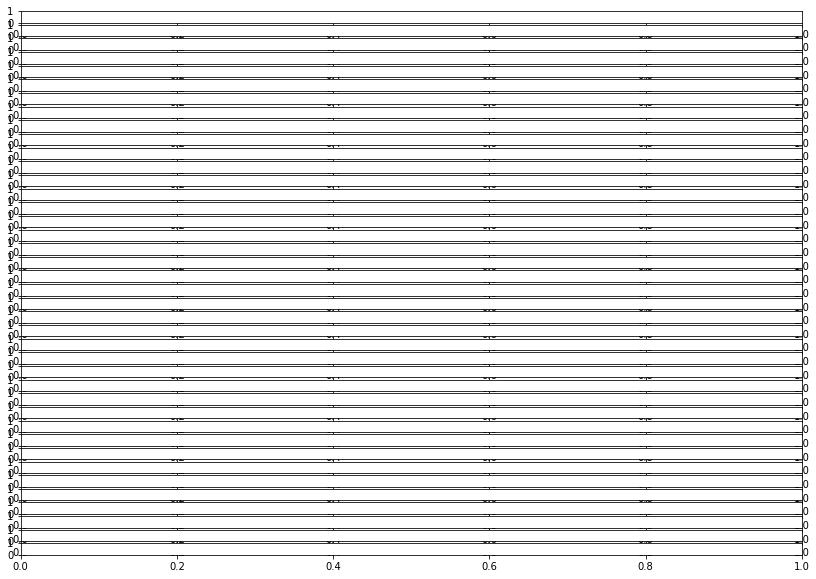

In [244]:
%%time
filtered_symbols = filter_symbols_fftcorr(file, plot=True)

# visualize

In [ ]:
symbols.num_symbols

In [ ]:
symbols.plot()

In [ ]:
batch_size = 50
batches = symbols.num_symbols // 50
print(f'batches = {batches}')

stop = 0

for epoch in range(1, symbols.num_symbols // 50):
    rows, cols = 10, 5
    fig, ax = plt.subplots(10, 5, figsize=(15,8))
    
    for i in range(rows):
        for j in range(cols):
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                ax[i, j].plot(symbols.data[epoch*i + epoch*i*j])
            
    stop += 1
    if stop > 5:
        break
    

# old dev

## setup

In [114]:
file = symloader.filter(bw=9, sf=11, att=40)[0]
display(file)
file.load()

pfile = _load_matching_dotp(file.bw, file.sf)
display(pfile)

base_symbol = pfile.to_signal()
display(base_symbol)

DotPFile(id=29 | name='lora_BW9_SF11_915MHz_20ksps_Att40_v0.p')

2020-04-10 20:21:17.471 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 800 and packet length: 24200
2020-04-10 20:21:17.575 | INFO     | lorapy.datafile._base_file:load:61 - loaded 5913600 samples from file


DotPFile(id=4 | name='lora_BW9_SF11_915MHz_20ksps_Att0_v0.p')

2020-04-10 20:21:17.579 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 800 and packet length: 24200
2020-04-10 20:21:17.580 | INFO     | lorapy.datafile._base_file:load:61 - loaded 799 samples from file


BaselineSymbolSet(num symbols=799 | BW: 9 | SF: 11 | Att: 0 | samples per symbol: 800 | packet length: 24200)

In [115]:
filtered_symbols, conv_vals = filter_symbols(file, thresh_type='quant', plot=False)

BaselineSymbolSet(num symbols=7392 | BW: 9 | SF: 11 | Att: 40 | samples per symbol: 800 | packet length: 24200)

2020-04-10 20:21:26.720 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 800 and packet length: 24200
2020-04-10 20:21:26.721 | INFO     | lorapy.datafile._base_file:load:61 - loaded 799 samples from file


BaselineSymbolSet(num symbols=799 | BW: 9 | SF: 11 | Att: 0 | samples per symbol: 800 | packet length: 24200)

2020-04-10 20:21:28.625 | INFO     | __main__:filter_symbols:19 - set threshold: 0.9628
2020-04-10 20:21:28.667 | WARNING  | __main__:filter_symbols:37 - removed 1849 symbols  [5543 / 7392]


In [134]:
bad_symbols = np.vstack([
    filtered_symbols[15],
    filtered_symbols[16],
    filtered_symbols[20],
    filtered_symbols[99],
    filtered_symbols[100],
    filtered_symbols[101],
    filtered_symbols[110],
    filtered_symbols[111],
])

good_symbols = np.vstack([
    filtered_symbols[0],
    filtered_symbols[5],
    filtered_symbols[8],
    filtered_symbols[71],
    filtered_symbols[1],
    filtered_symbols[3],
    filtered_symbols[29],
    filtered_symbols[30],
])

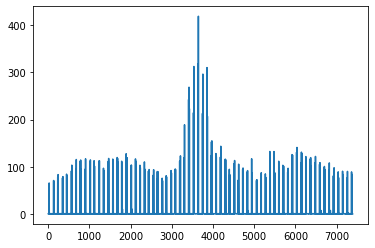

In [137]:
plt.plot(conv_vals)

## bad symbol location

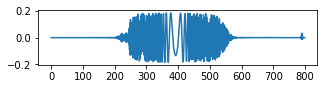

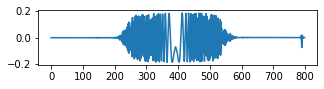

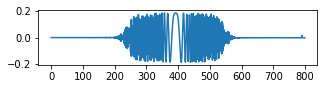

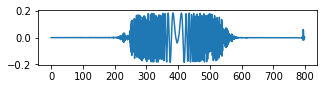

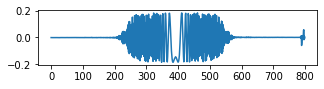

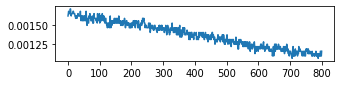

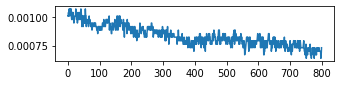

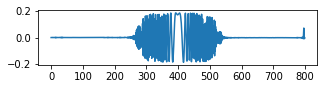

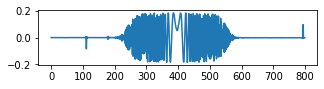

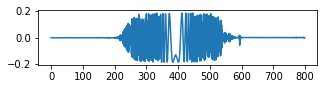

In [88]:
for sym in filtered_symbols[10:20]:
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        
        plt.figure(figsize=(5,1))
        plt.plot(sym)

In [69]:
sym_df = (
    pd.DataFrame({'good': good_symbol, 'bad': bad_symbol})
    .assign(
        good_abs = lambda df: np.abs(df.good),
        bad_abs = lambda df: np.abs(df.bad),
    )
)
sym_df.head()

,good,bad,good_abs,bad_abs
0,0.000214-0.000824j,0.001617+0.000366j,0.000851,0.001658
1,0.000122-0.001038j,0.001648+0.000366j,0.001045,0.001688
2,-0.000275-0.001099j,0.001679+0.000305j,0.001132,0.001706
3,-0.000397-0.000427j,0.001648+0.000305j,0.000583,0.001676
4,0.000183-0.000793j,0.001648+0.000305j,0.000814,0.001676


## metric exploration

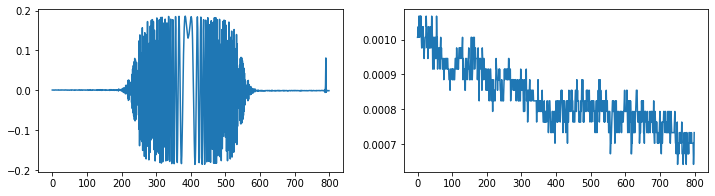

In [138]:
fig, ax = plt.subplots(1, 2, figsize=(12, 3))
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    ax[0].plot(good_symbols[0])
    ax[1].plot(bad_symbols[1])

## convolution

In [107]:
import scipy as sp
import scipy.stats as spstats
import scipy.signal as spsig

In [139]:
def _fft_convolve_autocorr(symbol: np.ndarray):
    return spsig.fftconvolve(symbol, symbol[::-1], mode='full')

def _sp_corr(base_symbol: np.ndarray, packet_slice: np.ndarray) -> float:
    min_size = np.min((base_symbol.size, packet_slice.size))
    corr = spsig.correlate(base_symbol, packet_slice)
    return np.abs(corr.max())
    

In [140]:
good_fftconvs = np.vstack([
    _fft_convolve_autocorr(sym)
    for sym in good_symbols
])

bad_fftconvs = np.vstack([
    _fft_convolve_autocorr(sym)
    for sym in bad_symbols
])

In [225]:
corr_vals = np.array([
    _sp_corr(base_symbol.data, fftconv)
    for fftconv in np.vstack([good_fftconvs, bad_fftconvs])
])

In [232]:
_fftconvs = np.vstack([
    _sp_corr(base_symbol.data, _fft_convolve_autocorr(sym))
    for sym in np.vstack([good_symbols, bad_symbols])
])

In [225]:
corr_vals = np.array([
    _sp_corr(base_symbol.data, fftconv)
    for fftconv in np.vstack([good_fftconvs, bad_fftconvs])
])

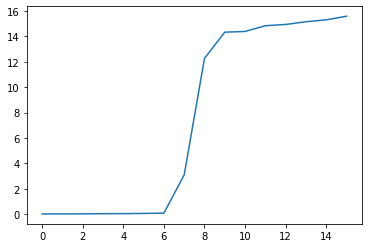

In [234]:
plt.plot(sorted(corr_vals))

In [235]:
filtered_symbols = [
    sym for sym, corr in zip(np.vstack([good_symbols,bad_symbols]), corr_vals)
    if corr > corr_vals.mean()
]

In [237]:
len(filtered_symbols)

8

In [215]:
idx = 0

2020-04-10 20:52:17.053 | WARNING  | __main__:<module>:1 - =========================
 idx = 2 =========================


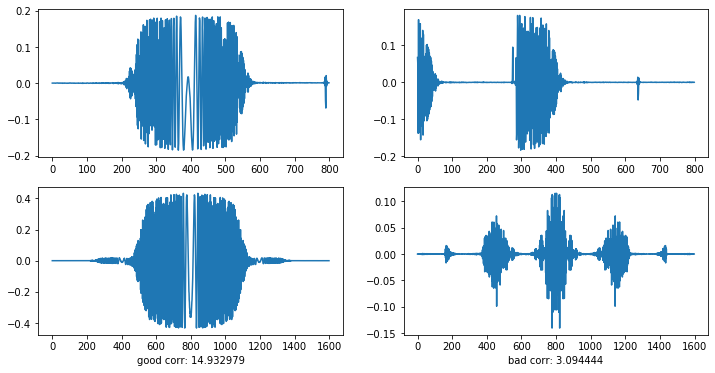

In [218]:
logger.warning(f'\n idx = {idx} '.center(60, '='))

good_fft_corr = _compute_corrcoefs(base_symbol.data, good_fftconvs[idx])
bad_fft_corr = _compute_corrcoefs(base_symbol.data, bad_fftconvs[idx])
good_sp_corr = _sp_corr(base_symbol.data, good_fftconvs[idx])
bad_sp_corr = _sp_corr(base_symbol.data, bad_fftconvs[idx])


fig, ax = plt.subplots(2, 2, figsize=(12, 6))
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    ax[0,0].plot(good_symbols[idx])
    ax[0,1].plot(bad_symbols[idx])
    ax[1,0].plot(good_fftconvs[idx])
    ax[1,0].set_xlabel(f'good corr: {good_sp_corr:0.6f}')
    ax[1,1].plot(bad_fftconvs[idx])
    ax[1,1].set_xlabel(f'bad corr: {bad_sp_corr:0.6f}')
    

idx += 1

## correlation

In [155]:
def _compute_corrcoefs(base_symbol: np.ndarray, packet_slice: np.ndarray) -> float:
    min_size = np.min((base_symbol.size, packet_slice.size))

    return np.real(np.abs(
        np.corrcoef(base_symbol[:min_size], packet_slice[:min_size])[0, 1]
    ))

In [202]:
def _sp_corr(base_symbol: np.ndarray, packet_slice: np.ndarray) -> float:
    min_size = np.min((base_symbol.size, packet_slice.size))
    corr = spsig.correlate(base_symbol, packet_slice)
    return np.abs(corr.max())
    

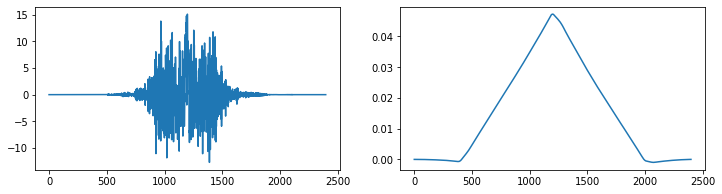

In [200]:
good_sp_corr = spsig.correlate(base_symbol.data, good_fftconvs[0])
bad_sp_corr = spsig.correlate(base_symbol.data, bad_fftconvs[0])

fig, ax = plt.subplots(1, 2, figsize=(12, 3))
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    ax[0].plot(good_sp_corr)
    ax[1].plot(bad_sp_corr)

In [105]:
_compute_corrcoefs(base_symbol.data, good_fftconv), _compute_corrcoefs(base_symbol.data, bad_fftconv)

(0.007732578694639291, 0.001796344291219614)